# Midterm Deliverable: EPA - GHG Emissions


**Due Date:** 2-9-2025

**Group Members**
* Migus Wong
* Michael Yoo
* David Van Dyke
* Ethan Norton

**Chosen Dataset :** [EPA - GHG Emissions](https://www.epa.gov/ghgreporting/data-sets)

## Table of Contents

>[Midterm Deliverable: EPA - GHG Emissions](#scrollTo=GuDBR3_ZR0P7)

>>[Table of Contents](#scrollTo=KVOpEm8dYT9o)

>>[Data Loading and Imports](#scrollTo=IavVxfAuYqLz)

>>[Null Analysis](#scrollTo=B-aYW5wwV_-I)

>>[EDA](#scrollTo=veOK4LeAbBWm)

>>[State Analysis](#scrollTo=eXXTkqVKLRfx)

>>[Outlier Detection](#scrollTo=jFcq7-JbLv2J)

>>[Top 20 by State](#scrollTo=s_yZw9THSl3_)

>>[Monitoring Status](#scrollTo=pSfoUcneUt4h)



# Importing drive

In [1]:
#Code to link colab notebook to google drive

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

import os
!mkdir -p "/content/drive/MyDrive/ColabFiles"
!pip install nbconvert

Mounted at /content/drive


# Data Loading and Imports

Reading files: 100%|██████████| 14/14 [01:45<00:00,  7.52s/it]



Merged Dataset Info:
Total rows: 94378
Total unique facilities: 8778

Rows per year:
Year
2010    6297
2011    6907
2012    7102
2013    7191
2014    7349
2015    7242
2016    6572
2017    6488
2018    6581
2019    6580
2020    6556
2021    6529
2022    6514
2023    6470
Name: count, dtype: int64

Missing Facility IDs: 0

Yearly Statistics:
     Facility Id Total reported direct emissions              
           count                            mean           sum
Year                                                          
2010        6297                       507634.06  3.196572e+09
2011        6907                       464395.97  3.207583e+09
2012        7102                       430593.61  3.058076e+09
2013        7191                       427369.48  3.073214e+09
2014        7349                       419658.29  3.084069e+09
2015        7242                       405888.37  2.939444e+09
2016        6572                       426680.55  2.804145e+09
2017        6488          

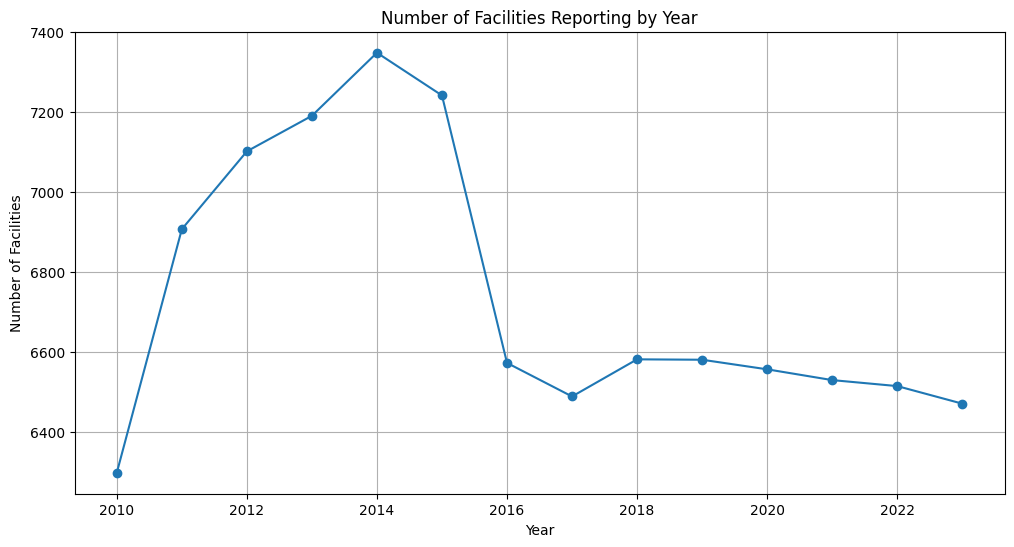

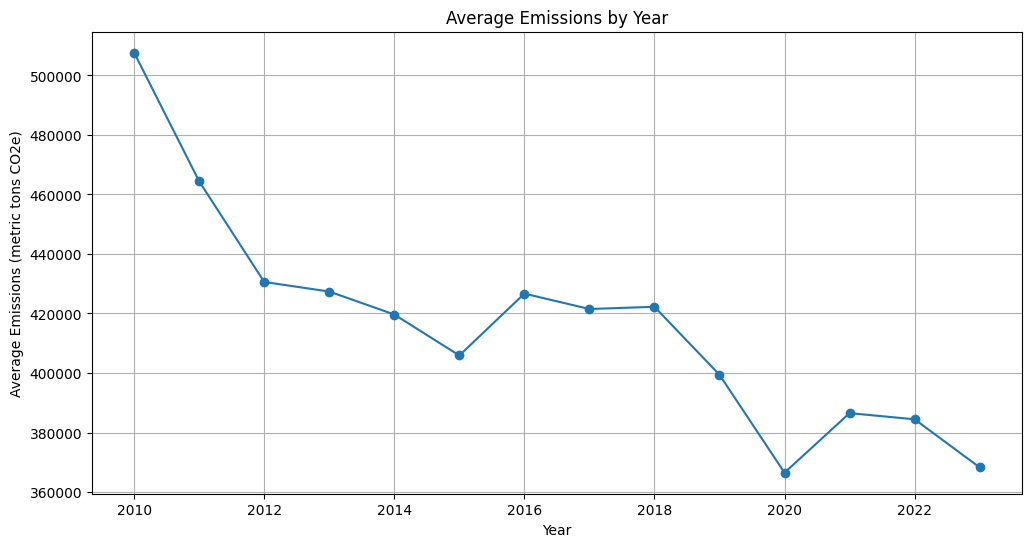

In [2]:
import pandas as pd
#!pip install openpyxl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
from tqdm import tqdm  # For progress bar

# Create an empty list to store dataframes
dfs = []

# Years we're working with
years = range(2010, 2024)

# Read each file
for year in tqdm(years, desc="Reading files"):
    file_path = f'/content/drive/MyDrive/MSDS422 - Group 1/Final Project/Data/ghgp_data_{year}.xlsx'

    # Read the file
    temp_df = pd.read_excel(file_path, skiprows=3)

    # Add year column
    temp_df['Year'] = year

    # Append to list
    dfs.append(temp_df)

# Merge all dataframes
merged_df = pd.concat(dfs, ignore_index=True)

# Print info about the merged dataset
print("\nMerged Dataset Info:")
print(f"Total rows: {len(merged_df)}")
print(f"Total unique facilities: {merged_df['Facility Id'].nunique()}")
print("\nRows per year:")
print(merged_df['Year'].value_counts().sort_index())

# Check for any missing Facility IDs
print(f"\nMissing Facility IDs: {merged_df['Facility Id'].isnull().sum()}")

# Basic statistics over time
yearly_stats = merged_df.groupby('Year').agg({
    'Facility Id': 'count',
    'Total reported direct emissions': ['mean', 'sum']
}).round(2)

print("\nYearly Statistics:")
print(yearly_stats)

# Optional: Save merged dataset
# merged_df.to_csv('merged_emissions_2010_2023.csv', index=False)

# Create a plot showing number of facilities over time
plt.figure(figsize=(12, 6))
merged_df['Year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Number of Facilities Reporting by Year')
plt.xlabel('Year')
plt.ylabel('Number of Facilities')
plt.grid(True)
plt.show()

# Create a plot showing average emissions over time
plt.figure(figsize=(12, 6))
yearly_avg = merged_df.groupby('Year')['Total reported direct emissions'].mean()
yearly_avg.plot(kind='line', marker='o')
plt.title('Average Emissions by Year')
plt.xlabel('Year')
plt.ylabel('Average Emissions (metric tons CO2e)')
plt.grid(True)
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)
merged_df.head()

,Facility Id,FRS Id,Facility Name,City,State,Zip Code,Address,County,Latitude,Longitude,Primary NAICS Code,Industry Type (subparts),Industry Type (sectors),Total reported direct emissions,CO2 emissions (non-biogenic),Methane (CH4) emissions,Nitrous Oxide (N2O) emissions,HFC emissions,PFC emissions,SF6 emissions,NF3 emissions,Other Fully Fluorinated GHG emissions,HFE emissions,Very Short-lived Compounds emissions,Other GHGs (metric tons CO2e),Biogenic CO2 emissions (metric tons),Stationary Combustion,Electricity Generation,Adipic Acid Production,Aluminum Production,Ammonia Manufacturing,Cement Production,Ferroalloy Production,Glass Production,HCFC–22 Production from HFC–23 Destruction,Hydrogen Production,Iron and Steel Production,Lead Production,Lime Production,Miscellaneous Use of Carbonates,Nitric Acid Production,Petrochemical Production,Petroleum Refining,Phosphoric Acid Production,Pulp and Paper Manufacturing,Silicon Carbide Production,Soda Ash Manufacturing,Titanium Dioxide Production,Zinc Production,Municipal Landfills,Is some CO2 collected on-site and used to manufacture other products and therefore not emitted from the affected manufacturing process unit(s)? (as reported under Subpart G or S),"Is some CO2 reported as emissions from the affected manufacturing process unit(s) under Subpart AA, G or P collected and transferred off-site or injected (as reported under Subpart PP)?",Does the facility employ continuous emissions monitoring?,Year,Electronics Manufacture,Fluorinated GHG Production,Magnesium Production,Petroleum and Natural Gas Systems – Offshore Production,Petroleum and Natural Gas Systems – Processing,Petroleum and Natural Gas Systems – Transmission/Compression,Petroleum and Natural Gas Systems – Underground Storage,Petroleum and Natural Gas Systems – LNG Storage,Petroleum and Natural Gas Systems – LNG Import/Export,Underground Coal Mines,Industrial Wastewater Treatment,Manufacture of Electric Transmission and Distribution Equipment,Industrial Waste Landfills
0,1004377,1.100438e+11,121 REGIONAL DISPOSAL FACILITY,MELISSA,TX,75454,3820 SAM RAYBURN HIGHWAY,COLLIN COUNTY,33.29857,-96.53586,562212.0,HH,Waste,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N,N,N,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000112,1.100198e+11,23rd and 3rd,BROOKLYN,NY,11232,730 3rd Avenue,Kings,40.66300,-74.00000,221112.0,"C,D",Power Plants,82959.744,82875.9,38.25,45.594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,362.800,82596.944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1006394,NaN,29-6 #2 Central Delivery Point,Blanco,NM,87412,NaN,Rio Arriba,36.74520,-107.44550,213112.0,C (Abbr),Petroleum and Natural Gas Systems,25176.656,25150.9,11.75,14.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25176.656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1002885,NaN,30-5 Central Delivery Point Compressor Station,Aztec,NM,87410,NaN,Rio Arriba,36.81180,-107.40360,213112.0,C (Abbr),Petroleum and Natural Gas Systems,38883.204,38843.2,18.25,21.754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38883.204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1002707,NaN,31-6 Central Delivery Point,BLOOMFIELD,NM,87413,NaN,Rio Arriba,36.83630,-107.41990,213112.0,C (Abbr),Petroleum and Natural Gas Systems,63884.360,63818.6,30.00,35.760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63884.360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
columns_to_keep = merged_df.columns[:14].tolist() + ['Year']
new_df = merged_df[columns_to_keep]
new_df

,Facility Id,FRS Id,Facility Name,City,State,Zip Code,Address,County,Latitude,Longitude,Primary NAICS Code,Industry Type (subparts),Industry Type (sectors),Total reported direct emissions,Year
0,1004377,1.100438e+11,121 REGIONAL DISPOSAL FACILITY,MELISSA,TX,75454,3820 SAM RAYBURN HIGHWAY,COLLIN COUNTY,33.298570,-96.535860,562212.0,HH,Waste,0.000,2010
1,1000112,1.100198e+11,23rd and 3rd,BROOKLYN,NY,11232,730 3rd Avenue,Kings,40.663000,-74.000000,221112.0,"C,D",Power Plants,82959.744,2010
2,1006394,NaN,29-6 #2 Central Delivery Point,Blanco,NM,87412,NaN,Rio Arriba,36.745200,-107.445500,213112.0,C (Abbr),Petroleum and Natural Gas Systems,25176.656,2010
3,1002885,NaN,30-5 Central Delivery Point Compressor Station,Aztec,NM,87410,NaN,Rio Arriba,36.811800,-107.403600,213112.0,C (Abbr),Petroleum and Natural Gas Systems,38883.204,2010
4,1002707,NaN,31-6 Central Delivery Point,BLOOMFIELD,NM,87413,NaN,Rio Arriba,36.836300,-107.419900,213112.0,C (Abbr),Petroleum and Natural Gas Systems,63884.360,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94373,1009093,1.100712e+11,Yoakum Cryogenic Plant,Yoakum,TX,77995,NaN,LAVACA COUNTY,29.342100,-97.110000,211130.0,"C,W-PROC",Petroleum and Natural Gas Systems,677366.162,2023
94374,1011356,NaN,ZIA II GAS PLANT,Lea County,NM,88240,NaN,Lea,32.643022,-103.808867,211130.0,"C,PP,UU,W-PROC","Injection of CO2,Petroleum and Natural Gas Sys...",339816.550,2023
94375,1003318,1.100230e+11,ZYBACH CRYOGENIC PLANT,Briscoe,TX,79011,16475 FM 1046,WHEELER COUNTY,35.605000,-100.148333,211130.0,"C,W-PROC",Petroleum and Natural Gas Systems,11289.016,2023
94376,1010592,1.100712e+11,Zider,Aiken,TX,75935,N 31 42'14.83,SHELBY COUNTY,31.795396,-94.179048,486210.0,"C,W-PROC",Petroleum and Natural Gas Systems,17138.670,2023


In [ ]:
# Display the data types of each column
print("Data Types:")
print(new_df.dtypes)

# Display the number of missing values in each column
print("\nMissing Values:")
print(new_df.isnull().sum())

# Display basic statistics for numerical columns
print("\nBasic Statistics:")
print(new_df.describe())

# Display basic statistics for categorical columns
print("\nCategorical Columns Statistics:")
print(new_df.describe(include=['object', 'category']))

Data Types:
Facility Id                          int64
FRS Id                             float64
Facility Name                       object
City                                object
State                               object
Zip Code                             int64
Address                             object
County                              object
Latitude                           float64
Longitude                          float64
Primary NAICS Code                 float64
Industry Type (subparts)            object
Industry Type (sectors)             object
Total reported direct emissions    float64
Year                                 int64
dtype: object

Missing Values:
Facility Id                           0
FRS Id                             2061
Facility Name                         0
City                                  0
State                                 0
Zip Code                              0
Address                            7442
County                          

In [ ]:
new_df = new_df.drop(columns=['FRS Id', 'Address', 'County'])

In [ ]:
# Display the data types of each column
print("Data Types:")
print(new_df.dtypes)

# Display the number of missing values in each column
print("\nMissing Values:")
print(new_df.isnull().sum())

# Display basic statistics for numerical columns
print("\nBasic Statistics:")
print(new_df.describe())

# Display basic statistics for categorical columns
print("\nCategorical Columns Statistics:")
print(new_df.describe(include=['object', 'category']))

Data Types:
Facility Id                          int64
Facility Name                       object
City                                object
State                               object
Zip Code                             int64
Latitude                           float64
Longitude                          float64
Primary NAICS Code                 float64
Industry Type (subparts)            object
Industry Type (sectors)             object
Total reported direct emissions    float64
Year                                 int64
dtype: object

Missing Values:
Facility Id                        0
Facility Name                      0
City                               0
State                              0
Zip Code                           0
Latitude                           0
Longitude                          0
Primary NAICS Code                 9
Industry Type (subparts)           0
Industry Type (sectors)            0
Total reported direct emissions    0
Year                              

   Facility Id  Zip Code  Latitude  Longitude  Primary NAICS Code  \
0      1004377     75454  33.29857  -96.53586            562212.0   
1      1000112     11232  40.66300  -74.00000            221112.0   
2      1006394     87412  36.74520 -107.44550            213112.0   
3      1002885     87410  36.81180 -107.40360            213112.0   
4      1002707     87413  36.83630 -107.41990            213112.0   

   Total reported direct emissions  Year  
0                            0.000  2010  
1                        82959.744  2010  
2                        25176.656  2010  
3                        38883.204  2010  
4                        63884.360  2010  
        Facility Id      Zip Code      Latitude     Longitude  \
count  9.437800e+04  94378.000000  94378.000000  94378.000000   
mean   1.005086e+06  54163.156784     37.407729    -92.671320   
std    3.459518e+03  27210.743663      5.930061     16.327049   
min    1.000001e+06      0.000000     13.297100   -174.113611   
25

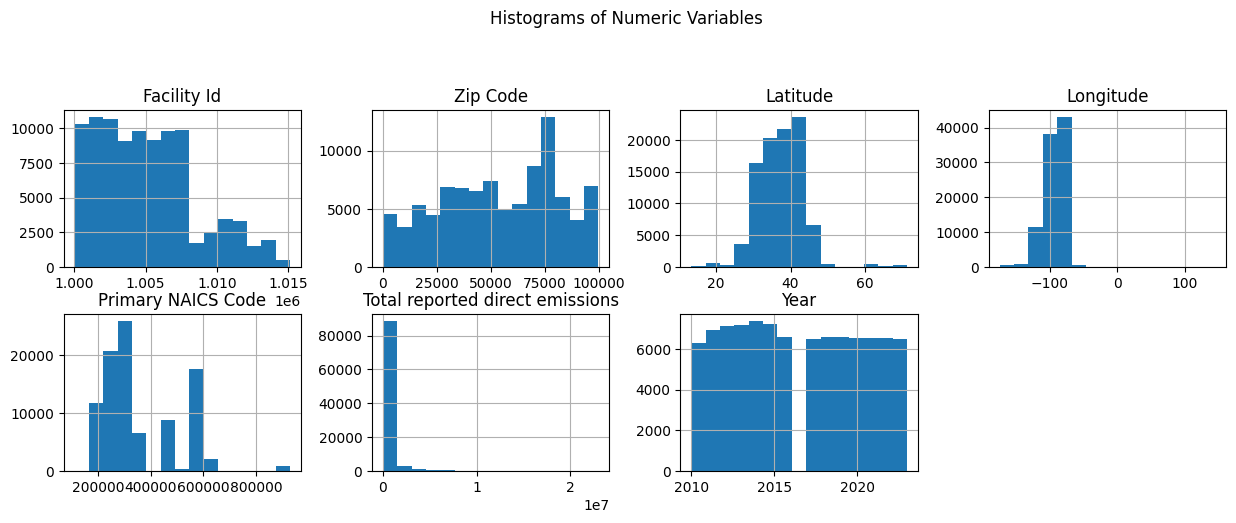

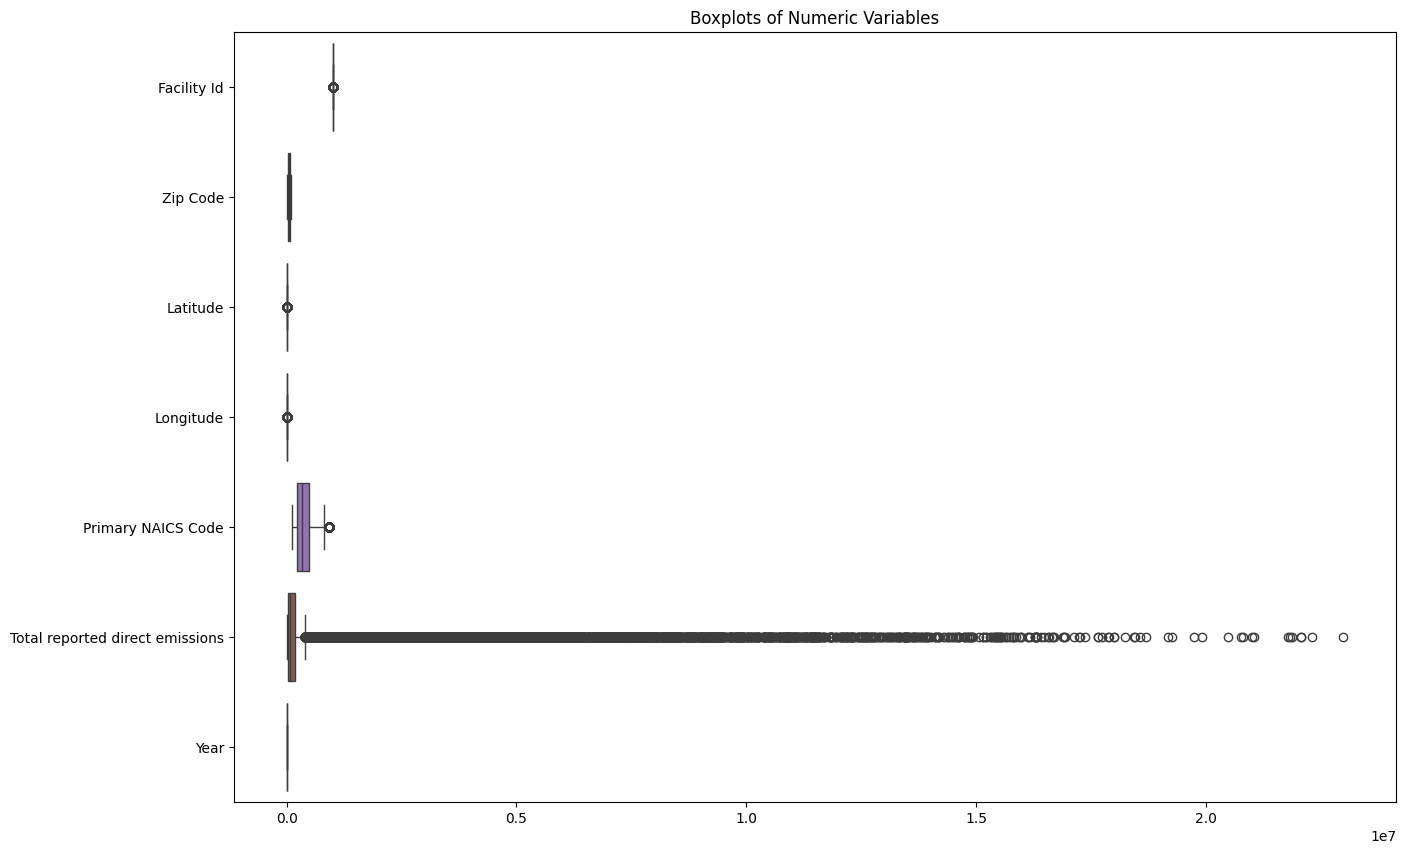

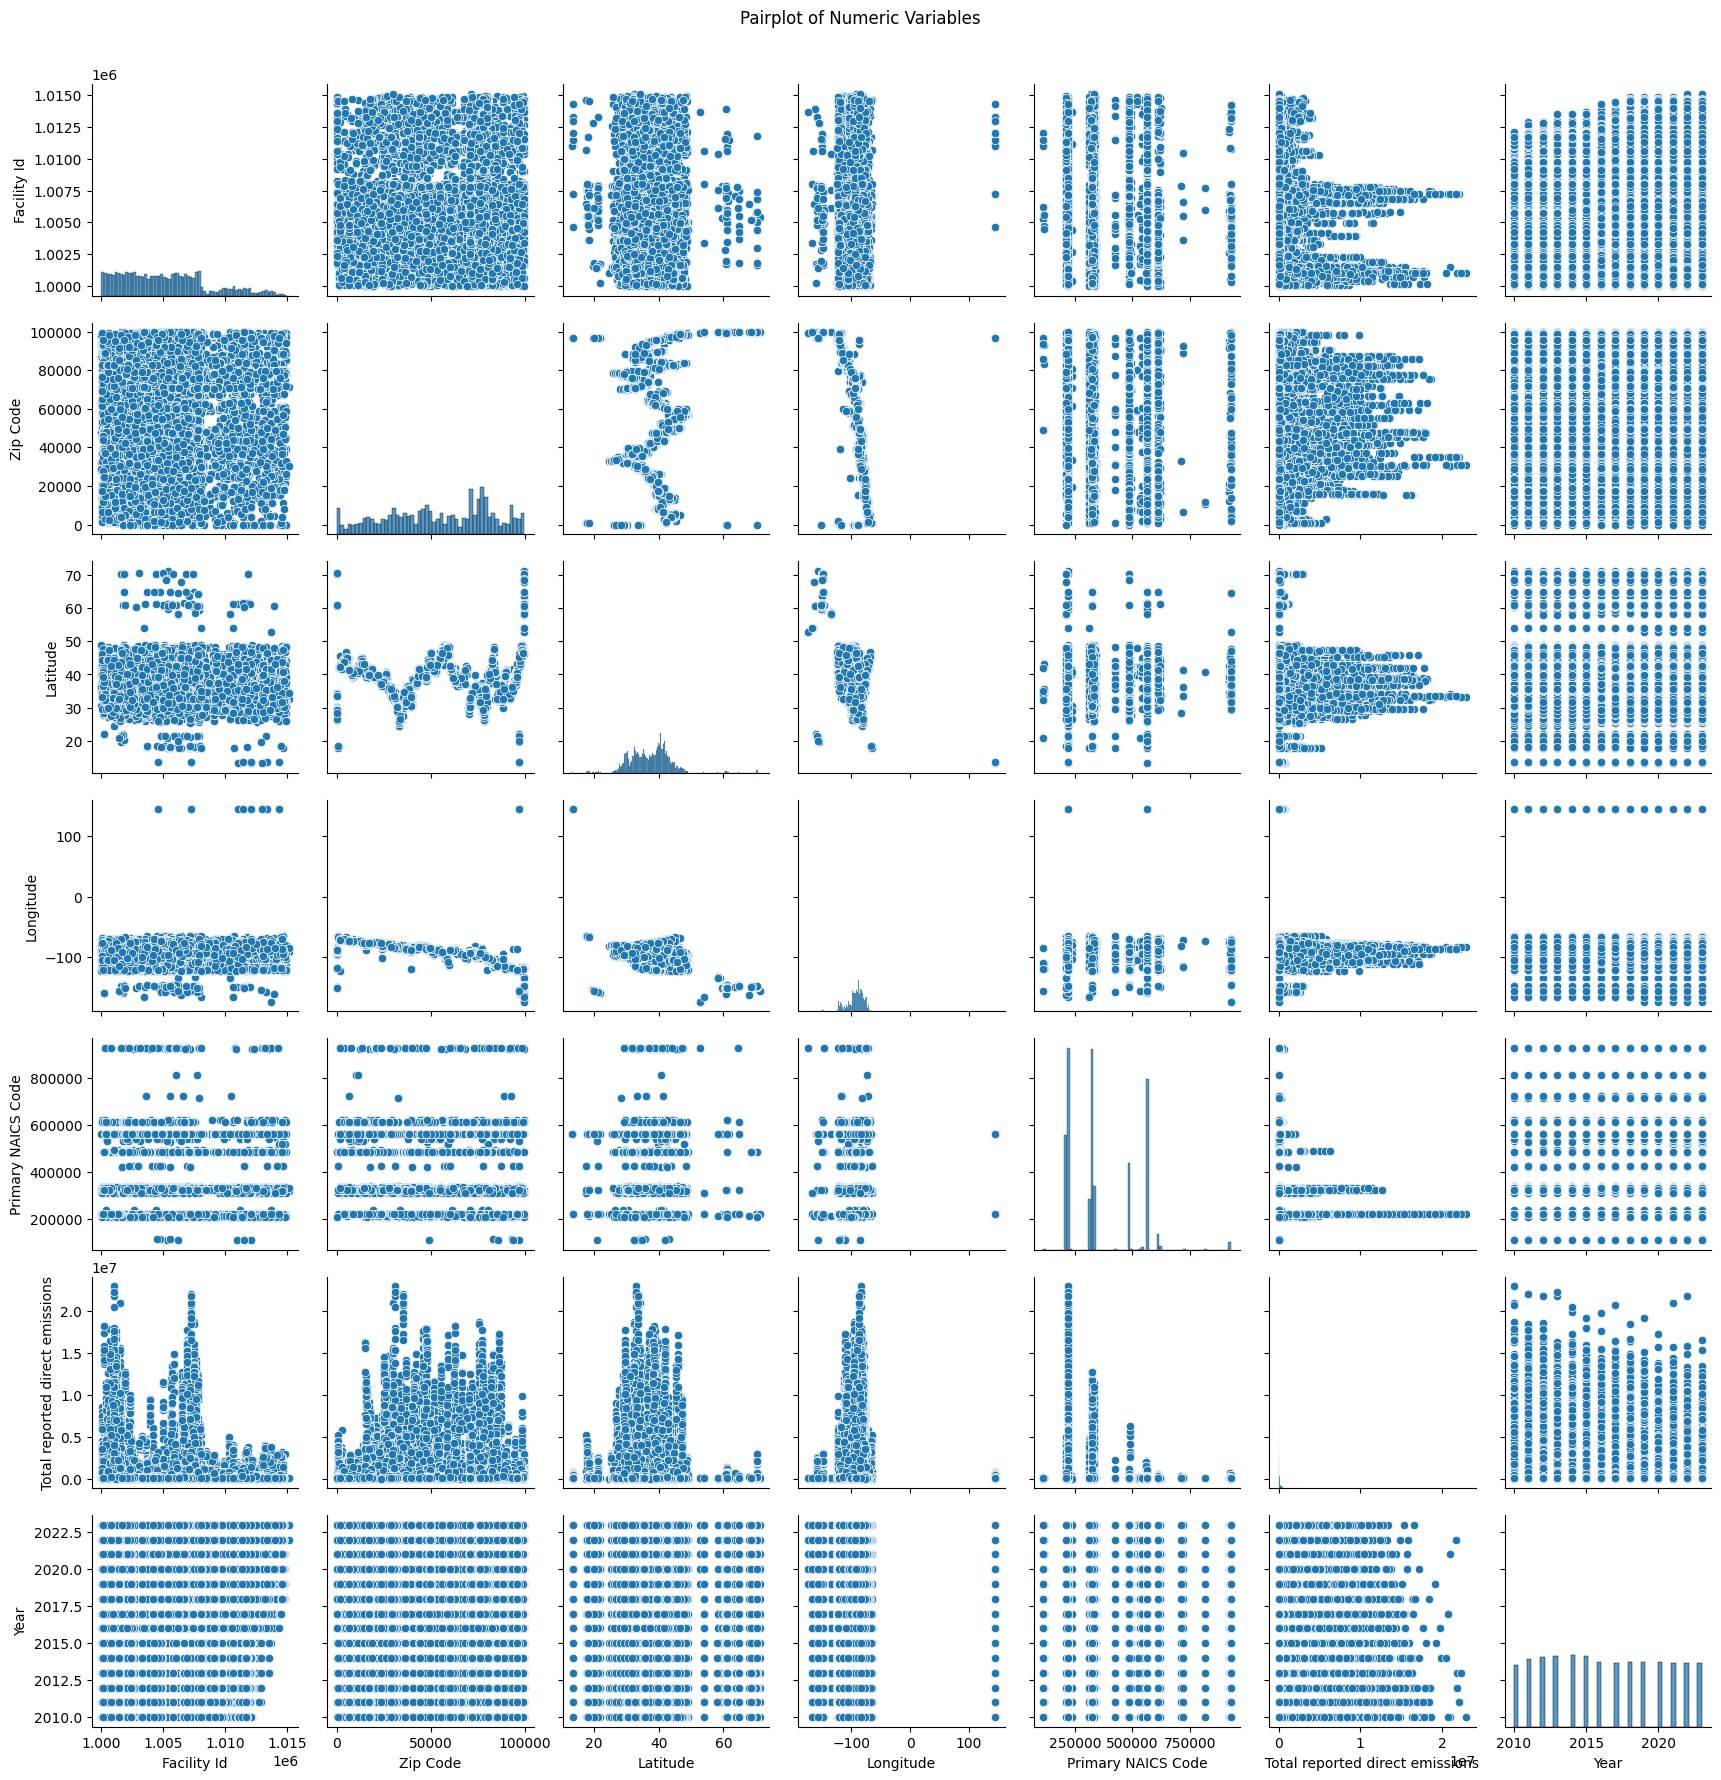

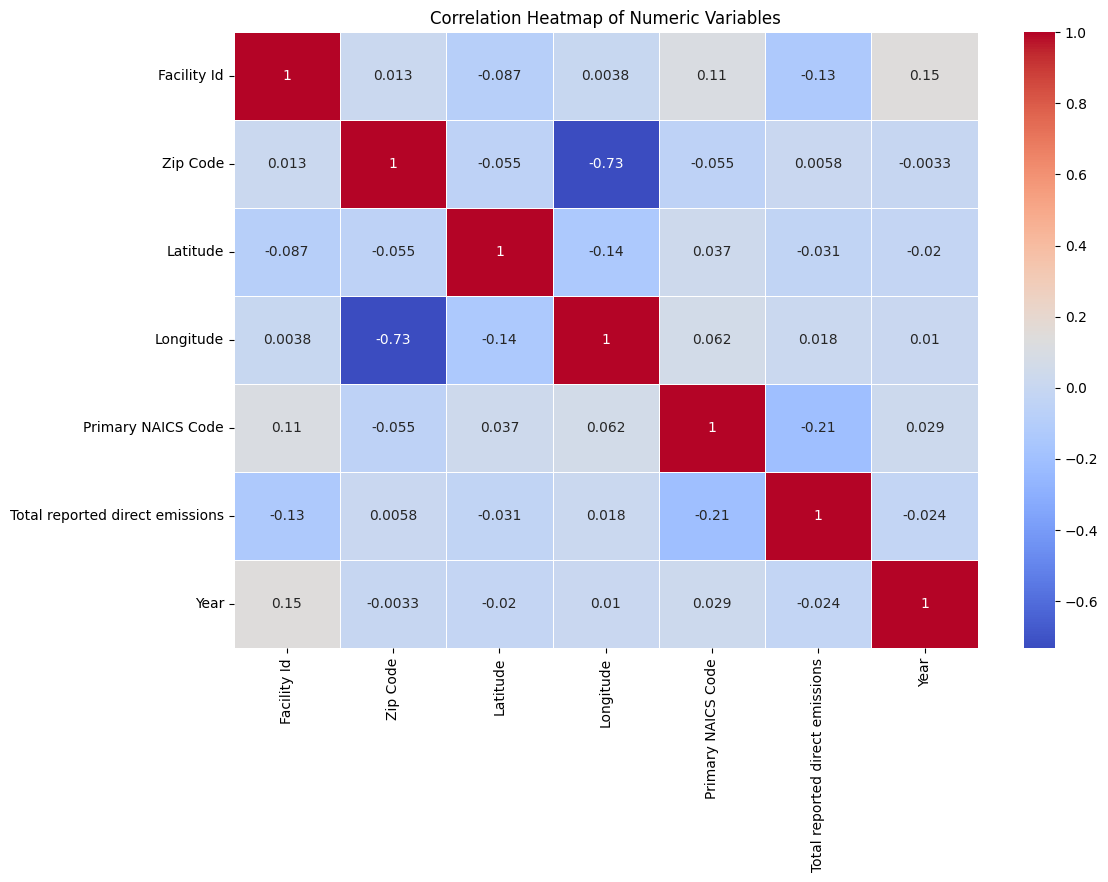

In [ ]:
#EDA on numeric varaibles
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming new_df is already defined and is a pandas DataFrame

# Select only integer and float columns
numeric_df = new_df.select_dtypes(include=['int64', 'float64'])

# Display the first few rows of the numeric dataframe
print(numeric_df.head())

# Display the summary statistics of the numeric dataframe
print(numeric_df.describe())

# Plot histograms for each numeric column
numeric_df.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Histograms of Numeric Variables')
plt.show()

# Plot boxplots for each numeric column
plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_df, orient='h')
plt.title('Boxplots of Numeric Variables')
plt.show()

# Plot pairplot to see relationships between numeric variables
sns.pairplot(numeric_df)
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

In [ ]:
# Get the unique values for the 'year' column
unique_years = new_df['Year'].unique()

# Display the unique values
print(unique_years)

[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


In [ ]:
#EDA on object Variables
# Select only object columns
object_df = new_df.select_dtypes(include=['object'])

# Display the first few rows of the object dataframe
print(object_df.head())

# Display the summary statistics of the object dataframe
print(object_df.describe())

# Display the unique values and their counts for each object column
for column in object_df.columns:
    print(f"\nUnique values in '{column}':")
    print(object_df[column].value_counts())

                                    Facility Name        City State  \
0                  121 REGIONAL DISPOSAL FACILITY     MELISSA    TX   
1                                    23rd and 3rd    BROOKLYN    NY   
2                  29-6 #2 Central Delivery Point      Blanco    NM   
3  30-5 Central Delivery Point Compressor Station       Aztec    NM   
4                     31-6 Central Delivery Point  BLOOMFIELD    NM   

  Industry Type (subparts)            Industry Type (sectors)  
0                       HH                              Waste  
1                      C,D                       Power Plants  
2                 C (Abbr)  Petroleum and Natural Gas Systems  
3                 C (Abbr)  Petroleum and Natural Gas Systems  
4                 C (Abbr)  Petroleum and Natural Gas Systems  
                   Facility Name      City  State Industry Type (subparts)  \
count                      94378     94378  94378                    94378   
unique                      9493 

In [21]:
#data prepration 1
columns_to_keep = merged_df.columns[:14].tolist() + ['Year']
new_df = merged_df[columns_to_keep]
new_df = new_df.drop(columns=['FRS Id', 'Address', 'County'])

# Split the 'Industry Type (subparts)' column by commas and create a set of unique subparts
unique_subparts = set()
new_df['Industry Type (subparts)'].str.split(',').apply(unique_subparts.update)

# Create columns for each unique subpart and mark 1 or 0 based on their presence
for subpart in unique_subparts:
    new_df[subpart] = new_df['Industry Type (subparts)'].apply(lambda x: 1 if subpart in x.split(',') else 0)

# Drop the original 'Industry Type (subparts)' column if not needed
new_df.drop(columns=['Industry Type (subparts)'], inplace=True)

In [4]:
#datapreparation 2
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix, hstack

# Assuming new_df is already loaded as a pandas DataFrame
# Step 1: Create identifiers dataframe and remove these columns from new_df
identifiers = new_df[['Facility Id', 'Facility Name', 'City', 'State', 'Zip Code','Year']]
new_df = new_df.drop(columns=['Facility Id', 'Facility Name', 'City', 'State', 'Zip Code','Year'])

# Add a new index to synchronize the identifiers
identifiers.loc[:, 'Index'] = identifiers.index
new_df['Index'] = new_df.index

# Step 2: One hot encoding for 'Primary NAICS Code' and 'Industry Type (sectors)'
encoder = OneHotEncoder(sparse_output=True, drop='first')
encoded_features = encoder.fit_transform(new_df[['Primary NAICS Code', 'Industry Type (sectors)']])
new_df = new_df.drop(columns=['Primary NAICS Code', 'Industry Type (sectors)'])

# Convert the remaining dataframe to a sparse matrix
remaining_features = csr_matrix(new_df.drop(columns=['Total reported direct emissions', 'Index']).values)

# Combine the encoded features with the remaining features
X = hstack([remaining_features, encoded_features])

# Step 3: Define the target variable
y = new_df['Total reported direct emissions'].values

<ipython-input-4-eaebddb7e960>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  identifiers.loc[:, 'Index'] = identifiers.index


In [22]:
#PCA data preparation 2
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix, hstack
from sklearn.decomposition import PCA

# Assuming new_df is already loaded as a pandas DataFrame
# Step 1: Create identifiers dataframe and remove these columns from new_df
identifiers = new_df[['Facility Id', 'Facility Name', 'City', 'State', 'Zip Code','Year']]
new_df = new_df.drop(columns=['Facility Id', 'Facility Name', 'City', 'State', 'Zip Code','Year'])

# Add a new index to synchronize the identifiers
identifiers.loc[:, 'Index'] = identifiers.index
new_df['Index'] = new_df.index

# Step 2: One hot encoding for 'Primary NAICS Code' and 'Industry Type (sectors)'
encoder = OneHotEncoder(sparse_output=True, drop='first')
encoded_features = encoder.fit_transform(new_df[['Primary NAICS Code', 'Industry Type (sectors)']])
new_df = new_df.drop(columns=['Primary NAICS Code', 'Industry Type (sectors)'])

# Convert the remaining dataframe to a sparse matrix
remaining_features = csr_matrix(new_df.drop(columns=['Total reported direct emissions', 'Index']).values)

# Combine the encoded features with the remaining features
X = hstack([remaining_features, encoded_features])

# Step 3: Define the target variable
y = new_df['Total reported direct emissions'].values

# Perform PCA on the one hot encoded variable to capture 95% of the variation
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(encoded_features.toarray())

# Print the shape of the transformed features
print(f"Original shape of encoded features: {encoded_features.shape}")
print(f"Transformed shape after PCA: {X_pca.shape}")

<ipython-input-22-3c4f7d6e4aee>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  identifiers.loc[:, 'Index'] = identifiers.index


Original shape of encoded features: (94378, 416)
Transformed shape after PCA: (94378, 101)


Cross-validation scores: [0.90814038 0.90481894 0.90742318 0.90243143 0.90813106]
Mean cross-validation score: 0.9061889971102557
Mean Squared Error: 144470956145.92566
R-squared: 0.9172610813059252


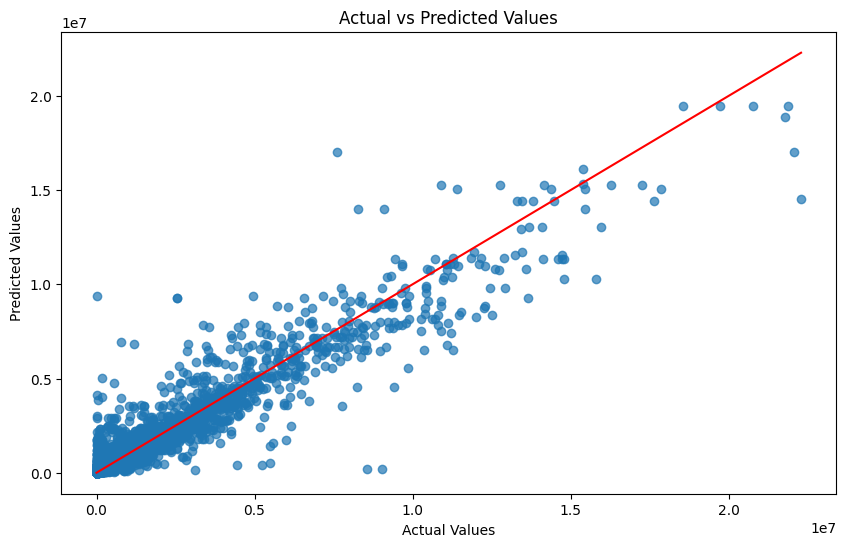

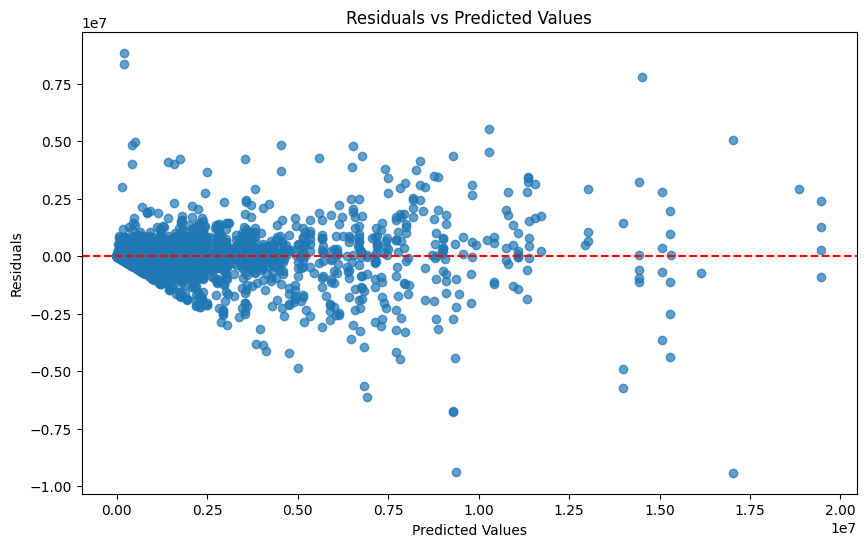

In [23]:
#Random forest model- Runs in about 4 hours
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix, hstack
from sklearn.decomposition import PCA

# Combine PCA-transformed features with remaining features
X_combined = hstack([remaining_features, csr_matrix(X_pca)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Perform cross-validation and print the mean score
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate and print performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.show()

# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [10]:
X_pca

array([[-8.77693480e-01,  8.30140849e-01, -1.85558063e-01, ...,
        -7.10790582e-05,  2.59423354e-05,  1.29114642e-05],
       [ 1.08475403e+00,  4.50498460e-01, -1.42826043e-01, ...,
        -6.55939873e-05,  2.36823874e-04, -2.08555663e-04],
       [-1.37450342e-01, -6.33395906e-01, -4.44483739e-01, ...,
        -2.10326028e-04, -9.34178108e-04,  4.38506789e-03],
       ...,
       [-1.43277576e-01, -6.64910341e-01, -4.68924950e-01, ...,
         1.52469854e-04, -7.23576926e-05, -4.65079136e-04],
       [-1.77205627e-01, -8.86699985e-01, -7.77796393e-01, ...,
        -5.44365792e-05,  3.98691748e-04, -7.35497022e-04],
       [-1.77205627e-01, -8.86699985e-01, -7.77796393e-01, ...,
        -5.44365792e-05,  3.98691748e-04, -7.35497022e-04]])

In [9]:
new_df

,Latitude,Longitude,Total reported direct emissions,MM-REF,UU,,W-NGTC,D,W-LNGIE,Y,...,TT,W,T,FF,NN-FRAC,DD,OO,O,P,Index
0,33.298570,-96.535860,0.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40.663000,-74.000000,82959.744,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,36.745200,-107.445500,25176.656,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,36.811800,-107.403600,38883.204,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,36.836300,-107.419900,63884.360,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94373,29.342100,-97.110000,677366.162,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,94373
94374,32.643022,-103.808867,339816.550,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,94374
94375,35.605000,-100.148333,11289.016,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,94375
94376,31.795396,-94.179048,17138.670,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,94376


Best parameters found: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Cross-validation RMSE: 667334.2455980922 ± 18675.8750859173


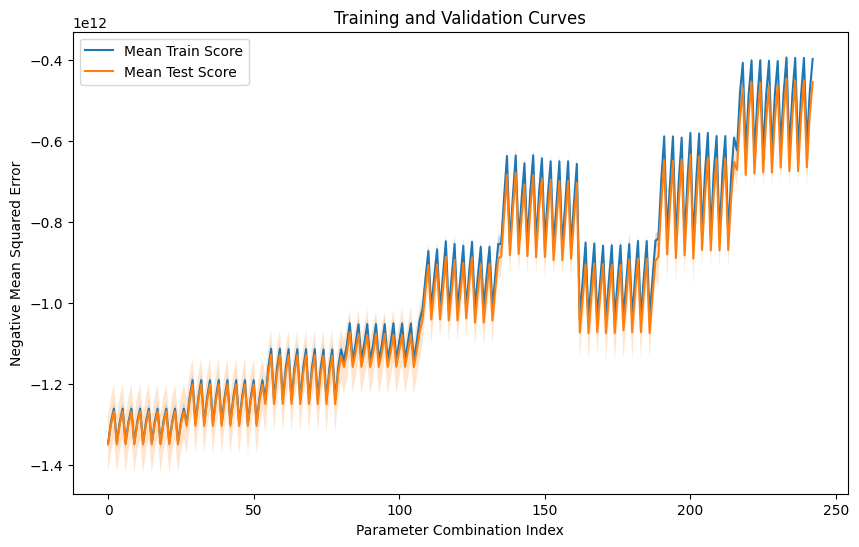

Top 50 Feature Importances:
 Primary NAICS Code_112111.0                                                                        0.313662
Primary NAICS Code_111930.0                                                                        0.250054
Primary NAICS Code_212220.0                                                                        0.243558
W-NGTC                                                                                             0.041526
Primary NAICS Code_312140.0                                                                        0.031489
Primary NAICS Code_212231.0                                                                        0.017049
Primary NAICS Code_212210.0                                                                        0.015318
Primary NAICS Code_212391.0                                                                        0.009587
Primary NAICS Code_212321.0                                                                        0.007066

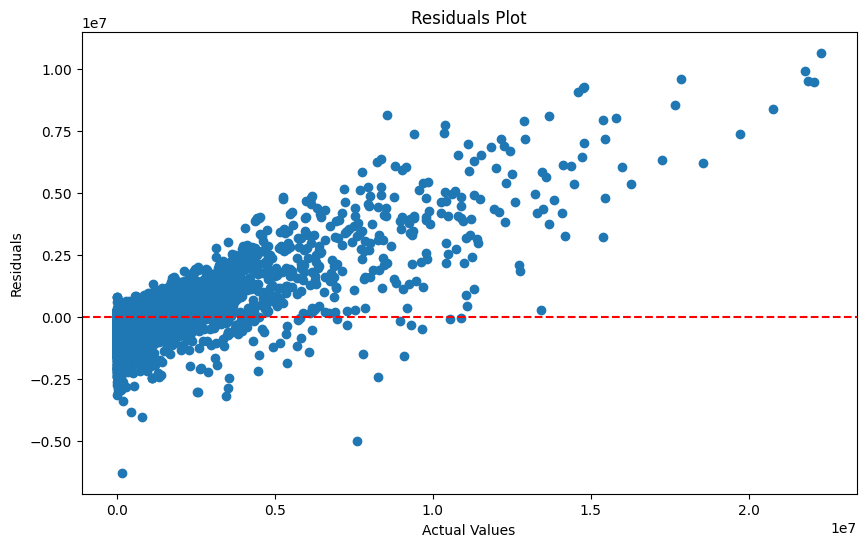

Test RMSE: 672926.2697983558


In [ ]:
#Gradient boosted trees model 4hr 38 min to run
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X and y are already defined and preprocessed

# Step 4: Create a test dataframe
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(X, y, new_df['Index'].values, test_size=0.2, random_state=42)

# Apply standard scaling to the features
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Set up a Gradient Boosting model with cross-validation and grid search
model = GradientBoostingRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by grid search
print(f"Best parameters found: {grid_search.best_params_}")

# Step 6: Show cross-validation results with RMSE standard deviation between the folds
cv_results = cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_results)
print(f"Cross-validation RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}")

# Step 7: Plot the training and validation curves
plt.figure(figsize=(10, 6))
plt.plot(grid_search.cv_results_['mean_train_score'], label='Mean Train Score')
plt.fill_between(range(len(grid_search.cv_results_['mean_train_score'])),
                 grid_search.cv_results_['mean_train_score'] - grid_search.cv_results_['std_train_score'],
                 grid_search.cv_results_['mean_train_score'] + grid_search.cv_results_['std_train_score'], alpha=0.2)
plt.plot(grid_search.cv_results_['mean_test_score'], label='Mean Test Score')
plt.fill_between(range(len(grid_search.cv_results_['mean_test_score'])),
                 grid_search.cv_results_['mean_test_score'] - grid_search.cv_results_['std_test_score'],
                 grid_search.cv_results_['mean_test_score'] + grid_search.cv_results_['std_test_score'], alpha=0.2)
plt.xlabel('Parameter Combination Index')
plt.ylabel('Negative Mean Squared Error')
plt.title('Training and Validation Curves')
plt.legend()
plt.show()

# Step 8: List the top 50 most important features
best_model = grid_search.best_estimator_
feature_importances = pd.Series(best_model.feature_importances_, index=encoder.get_feature_names_out(['Primary NAICS Code', 'Industry Type (sectors)']).tolist() + new_df.drop(columns=['Total reported direct emissions', 'Index']).columns.tolist())
top_50_features = feature_importances.sort_values(ascending=False).head(50)
print("Top 50 Feature Importances:\n", top_50_features)

# Step 9: Run the test data through the best model
y_pred = best_model.predict(X_test_scaled)

# Step 10: Plot the residuals on the test data and show the RMSE
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {test_rmse}")

# Step 11: Create data frames with the identifiers merged in
train_results = pd.DataFrame({'Index': train_indices, 'Actual': y_train, 'Predicted': best_model.predict(X_train_scaled)})
test_results = pd.DataFrame({'Index': test_indices, 'Actual': y_test, 'Predicted': y_pred})

train_results = pd.merge(train_results, identifiers, on='Index')
test_results = pd.merge(test_results, identifiers, on='Index')

# Format the 'Predicted' column to display values in non-scientific notation
train_results['Predicted'] = train_results['Predicted'].apply(lambda x: '{:.6f}'.format(x))
test_results['Predicted'] = test_results['Predicted'].apply(lambda x: '{:.6f}'.format(x))

Best parameters found: {'learning_rate': 1, 'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 200}
Cross-validation RMSE: 405300.0297710365 ± 7804.075263200358


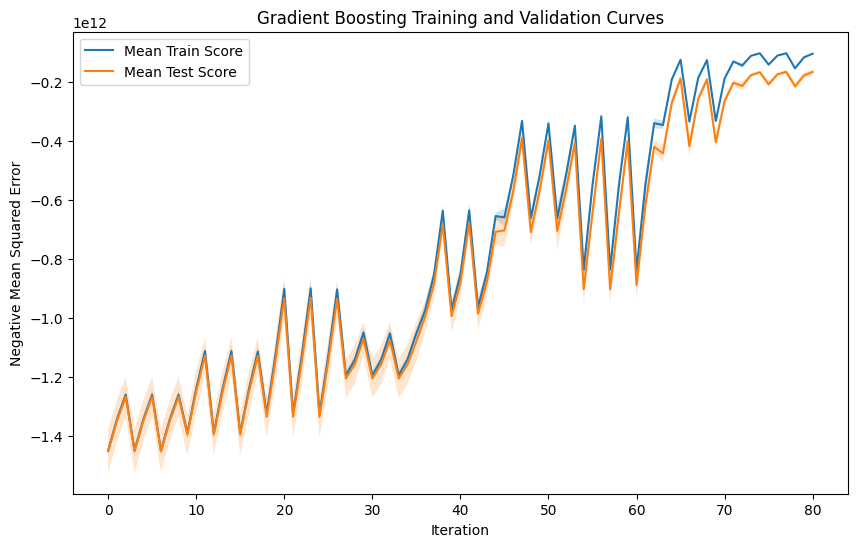

In [ ]:
# prompt: modify the code below to test a gradient boosted trees model.   #decision tree modes- standard scaling
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# # Assuming X and y are already defined and preprocessed
# # Step 4: Create a test dataframe
# X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(X, y, new_df['Index'].values, test_size=0.2, random_state=42)
# # Apply standard scaling to the features
# scaler = StandardScaler(with_mean=False)
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# # Step 5: Set up a Decision Tree model with cross-validation and grid search
# model = DecisionTreeRegressor(random_state=42)
# param_grid = {
#     'max_depth': [100, 150, 200],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, return_train_score=True)
# grid_search.fit(X_train_scaled, y_train)
# # Print the best parameters found by grid search
# print(f"Best parameters found: {grid_search.best_params_}")
# # Step 6: Show cross-validation results with RMSE standard deviation between the folds
# cv_results = cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
# rmse_scores = np.sqrt(-cv_results)
# print(f"Cross-validation RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}")
# # Step 7: Plot the training and validation curves
# plt.figure(figsize=(10, 6))
# plt.plot(grid_search.cv_results_['mean_train_score'], label='Mean Train Score')
# plt.fill_between(range(len(grid_search.cv_results_['mean_train_score'])),
#                  grid_search.cv_results_['mean_train_score'] - grid_search.cv_results_['std_train

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split #Import train_test_split
from sklearn.preprocessing import StandardScaler #Import StandardScaler

# Assuming X and y are already defined and preprocessed
# Step 4: Create a test dataframe
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(X, y, new_df['Index'].values, test_size=0.2, random_state=42)
# Apply standard scaling to the features
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train) #Define X_train_scaled
X_test_scaled = scaler.transform(X_test) #Define X_test_scaled

# Step 5: Set up a Gradient Boosted Trees model with cross-validation and grid search
model = GradientBoostingRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by grid search
print(f"Best parameters found: {grid_search.best_params_}")

# Step 6: Show cross-validation results with RMSE standard deviation between the folds
cv_results = cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_results)
print(f"Cross-validation RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}")

# Step 7: Plot the training and validation curves
plt.figure(figsize=(10, 6))
plt.plot(grid_search.cv_results_['mean_train_score'], label='Mean Train Score')
plt.plot(grid_search.cv_results_['mean_test_score'], label='Mean Test Score') # Added mean test score
plt.fill_between(range(len(grid_search.cv_results_['mean_train_score'])),
                 grid_search.cv_results_['mean_train_score'] - grid_search.cv_results_['std_train_score'],
                 grid_search.cv_results_['mean_train_score'] + grid_search.cv_results_['std_train_score'],
                 alpha=0.2)
plt.fill_between(range(len(grid_search.cv_results_['mean_test_score'])), # Added fill for test score
                 grid_search.cv_results_['mean_test_score'] - grid_search.cv_results_['std_test_score'],
                 grid_search.cv_results_['mean_test_score'] + grid_search.cv_results_['std_test_score'],
                 alpha=0.2)
plt.xlabel('Iteration')
plt.ylabel('Negative Mean Squared Error')
plt.title('Gradient Boosting Training and Validation Curves')
plt.legend()
plt.show()

In [ ]:
# prompt: modify the code below to test a gradient boosted trees model.   #decision tree modes- standard scaling
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# # Assuming X and y are already defined and preprocessed
# # Step 4: Create a test dataframe
# X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(X, y, new_df['Index'].values, test_size=0.2, random_state=42)
# # Apply standard scaling to the features
# scaler = StandardScaler(with_mean=False)
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# # Step 5: Set up a Decision Tree model with cross-validation and grid search
# model = DecisionTreeRegressor(random_state=42)
# param_grid = {
#     'max_depth': [100, 150, 200],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, return_train_score=True)
# grid_search.fit(X_train_scaled, y_train)
# # Print the best parameters found by grid search
# print(f"Best parameters found: {grid_search.best_params_}")
# # Step 6: Show cross-validation results with RMSE standard deviation between the folds
# cv_results = cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
# rmse_scores = np.sqrt(-cv_results)
# print(f"Cross-validation RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}")
# # Step 7: Plot the training and validation curves
# plt.figure(figsize=(10, 6))
# plt.plot(grid_search.cv_results_['mean_train_score'], label='Mean Train Score')
# plt.fill_between(range(len(grid_search.cv_results_['mean_train_score'])),
#                  grid_search.cv_results_['mean_train_score'] - grid_search.cv_results_['std_train

from sklearn.ensemble import GradientBoostingRegressor

# Step 5: Set up a Gradient Boosted Trees model with cross-validation and grid search
model = GradientBoostingRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by grid search
print(f"Best parameters found: {grid_search.best_params_}")

# Step 6: Show cross-validation results with RMSE standard deviation between the folds
cv_results = cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_results)
print(f"Cross-validation RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}")

# Step 7: Plot the training and validation curves
plt.figure(figsize=(10, 6))
plt.plot(grid_search.cv_results_['mean_train_score'], label='Mean Train Score')
plt.plot(grid_search.cv_results_['mean_test_score'], label='Mean Test Score') # Added mean test score
plt.fill_between(range(len(grid_search.cv_results_['mean_train_score'])),
                 grid_search.cv_results_['mean_train_score'] - grid_search.cv_results_['std_train_score'],
                 grid_search.cv_results_['mean_train_score'] + grid_search.cv_results_['std_train_score'],
                 alpha=0.2)
plt.fill_between(range(len(grid_search.cv_results_['mean_test_score'])), # Added fill for test score
                 grid_search.cv_results_['mean_test_score'] - grid_search.cv_results_['std_test_score'],
                 grid_search.cv_results_['mean_test_score'] + grid_search.cv_results_['std_test_score'],
                 alpha=0.2)
plt.xlabel('Iteration')
plt.ylabel('Negative Mean Squared Error')
plt.title('Gradient Boosting Training and Validation Curves')
plt.legend()
plt.show()


In [ ]:
#decision tree modes- standard scaling
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X and y are already defined and preprocessed

# Step 4: Create a test dataframe
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(X, y, new_df['Index'].values, test_size=0.2, random_state=42)

# Apply standard scaling to the features
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Set up a Decision Tree model with cross-validation and grid search
model = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': [100, 150, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by grid search
print(f"Best parameters found: {grid_search.best_params_}")

# Step 6: Show cross-validation results with RMSE standard deviation between the folds
cv_results = cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_results)
print(f"Cross-validation RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}")

# Step 7: Plot the training and validation curves
plt.figure(figsize=(10, 6))
plt.plot(grid_search.cv_results_['mean_train_score'], label='Mean Train Score')
plt.fill_between(range(len(grid_search.cv_results_['mean_train_score'])),
                 grid_search.cv_results_['mean_train_score'] - grid_search.cv_results_['std_train_score'],
                 grid_search.cv_results_['mean_train_score'] + grid_search.cv_results_['std_train_score'], alpha=0.2)
plt.plot(grid_search.cv_results_['mean_test_score'], label='Mean Test Score')
plt.fill_between(range(len(grid_search.cv_results_['mean_test_score'])),
                 grid_search.cv_results_['mean_test_score'] - grid_search.cv_results_['std_test_score'],
                 grid_search.cv_results_['mean_test_score'] + grid_search.cv_results_['std_test_score'], alpha=0.2)
plt.xlabel('Parameter Combination Index')
plt.ylabel('Negative Mean Squared Error')
plt.title('Training and Validation Curves')
plt.legend()
plt.show()

# Step 8: List the most important features
best_model = grid_search.best_estimator_
feature_importances = pd.Series(best_model.feature_importances_, index=encoder.get_feature_names_out(['Primary NAICS Code', 'Industry Type (sectors)']).tolist() + new_df.drop(columns=['Total reported direct emissions', 'Index']).columns.tolist())
print("Feature Importances:\n", feature_importances.sort_values(ascending=False))

# Step 9: Run the test data through the best model
y_pred = best_model.predict(X_test_scaled)

# Step 10: Plot the residuals on the test data and show the RMSE
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {test_rmse}")

# Step 11: Create data frames with the identifiers merged in
train_results = pd.DataFrame({'Index': train_indices, 'Actual': y_train, 'Predicted': best_model.predict(X_train_scaled)})
test_results = pd.DataFrame({'Index': test_indices, 'Actual': y_test, 'Predicted': y_pred})

train_results = pd.merge(train_results, identifiers, on='Index')
test_results = pd.merge(test_results, identifiers, on='Index')

# Format the 'Predicted' column to display values in non-scientific notation
train_results['Predicted'] = train_results['Predicted'].apply(lambda x: '{:.6f}'.format(x))
test_results['Predicted'] = test_results['Predicted'].apply(lambda x: '{:.6f}'.format(x))

In [ ]:
#test an SVM model- 1hr 1 minute to solve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X and y are already defined and preprocessed

# Step 4: Create a test dataframe
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(X, y, new_df['Index'].values, test_size=0.2, random_state=42)

# Apply standard scaling to the features
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Set up an SVM model with cross-validation
model = SVR()
cv_results = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_results)
print(f"Cross-validation RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}")

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Step 6: Plot the cross-validation results
plt.figure(figsize=(10, 6))
plt.plot(rmse_scores, label='Cross-Validation RMSE')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE')
plt.legend()
plt.show()

# Step 7: Run the test data through the model
y_pred = model.predict(X_test_scaled)

# Step 8: Plot the residuals on the test data and show the RMSE
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {test_rmse}")

# Step 9: Create data frames with the identifiers merged in
train_results = pd.DataFrame({'Index': train_indices, 'Actual': y_train, 'Predicted': model.predict(X_train_scaled)})
test_results = pd.DataFrame({'Index': test_indices, 'Actual': y_test, 'Predicted': y_pred})

train_results = pd.merge(train_results, identifiers, on='Index')
test_results = pd.merge(test_results, identifiers, on='Index')

# Format the 'Predicted' column to display values in non-scientific notation
train_results['Predicted'] = train_results['Predicted'].apply(lambda x: '{:.6f}'.format(x))
test_results['Predicted'] = test_results['Predicted'].apply(lambda x: '{:.6f}'.format(x))

Cross-validation RMSE: 1137641.9755048198 ± 28541.15403366155


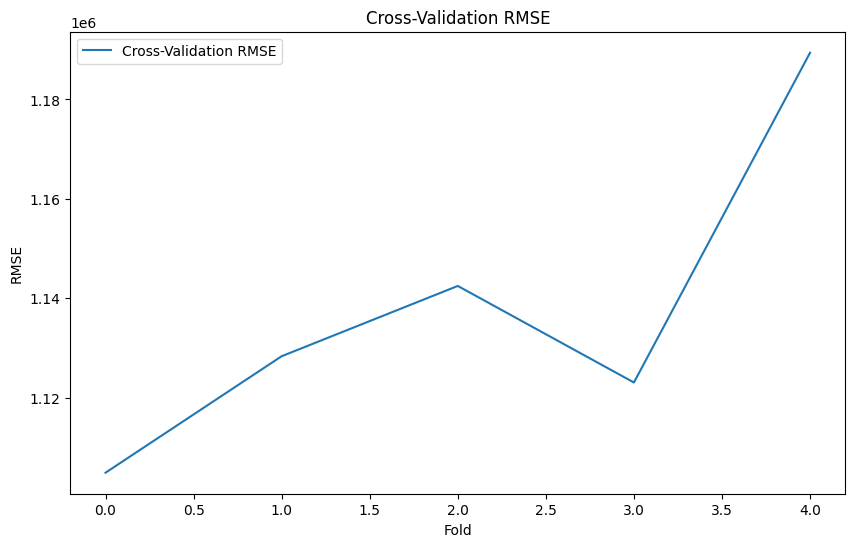

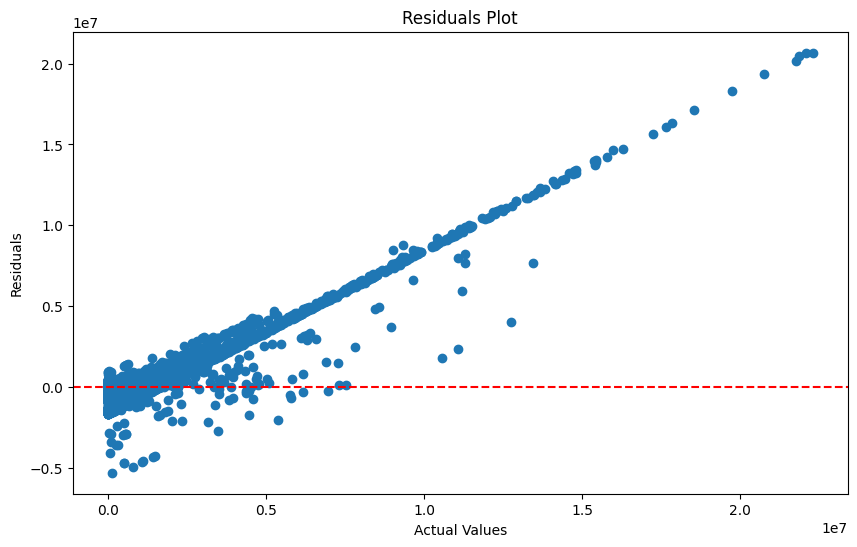

Test RMSE: 1169392.9738990134


In [ ]:
#linear regression model- Standard scaled
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X and y are already defined and preprocessed

# Step 4: Create a test dataframe
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(X, y, new_df['Index'].values, test_size=0.2, random_state=42)

# Apply standard scaling to the features
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Set up a Linear Regression model with cross-validation
model = LinearRegression()
cv_results = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_results)
print(f"Cross-validation RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}")

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Step 6: Plot the cross-validation results
plt.figure(figsize=(10, 6))
plt.plot(rmse_scores, label='Cross-Validation RMSE')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE')
plt.legend()
plt.show()

# Step 7: Run the test data through the model
y_pred = model.predict(X_test_scaled)

# Step 8: Plot the residuals on the test data and show the RMSE
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {test_rmse}")

# Step 9: Create data frames with the identifiers merged in
train_results = pd.DataFrame({'Index': train_indices, 'Actual': y_train, 'Predicted': model.predict(X_train_scaled)})
test_results = pd.DataFrame({'Index': test_indices, 'Actual': y_test, 'Predicted': y_pred})

train_results = pd.merge(train_results, identifiers, on='Index')
test_results = pd.merge(test_results, identifiers, on='Index')

# Format the 'Predicted' column to display values in non-scientific notation
train_results['Predicted'] = train_results['Predicted'].apply(lambda x: '{:.6f}'.format(x))
test_results['Predicted'] = test_results['Predicted'].apply(lambda x: '{:.6f}'.format(x))

Best parameters found: {'max_depth': 100, 'min_samples_leaf': 1, 'min_samples_split': 2}
Cross-validation RMSE: 404432.9124852665 ± 8596.494622664599


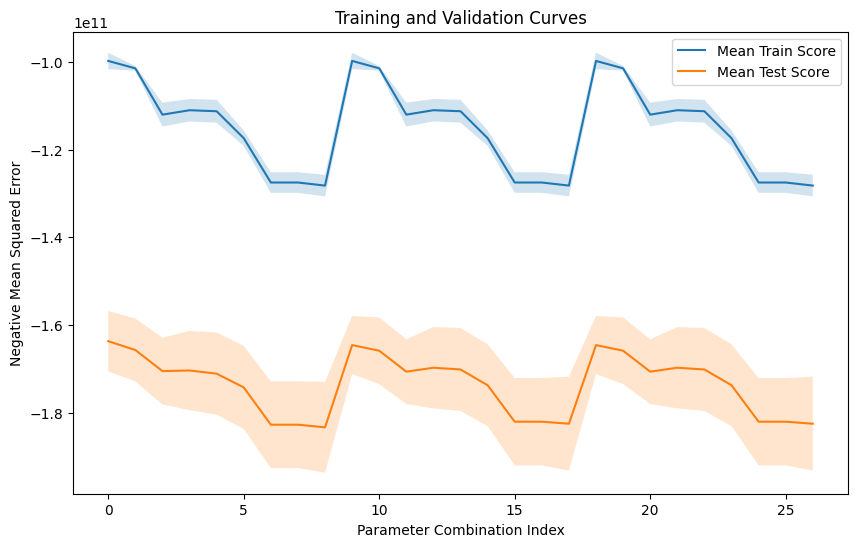

Feature Importances:
 Primary NAICS Code_111930.0                                                              0.357864
Primary NAICS Code_112111.0                                                              0.344227
Primary NAICS Code_212220.0                                                              0.172097
Primary NAICS Code_212391.0                                                              0.024880
W-NGTC                                                                                   0.018005
                                                                                           ...   
Industry Type (sectors)_Petroleum Product Suppliers,Petroleum and Natural Gas Systems    0.000000
Primary NAICS Code_325211.0                                                              0.000000
Industry Type (sectors)_Other,Suppliers of CO2                                           0.000000
Primary NAICS Code_541380.0                                                              0.00000

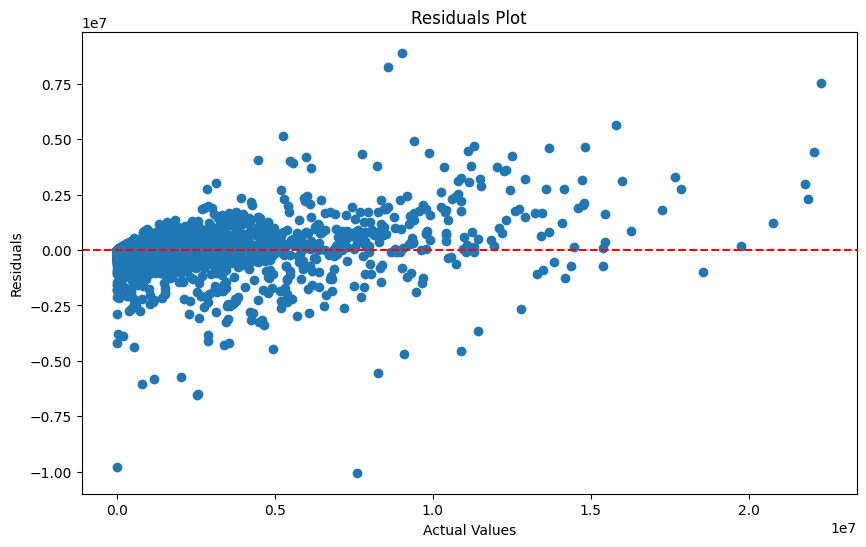

Test RMSE: 375229.8856469274


In [ ]:
#decision tree modes- standard scaling
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X and y are already defined and preprocessed

# Step 4: Create a test dataframe
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(X, y, new_df['Index'].values, test_size=0.2, random_state=42)

# Apply standard scaling to the features
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Set up a Decision Tree model with cross-validation and grid search
model = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': [100, 150, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by grid search
print(f"Best parameters found: {grid_search.best_params_}")

# Step 6: Show cross-validation results with RMSE standard deviation between the folds
cv_results = cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_results)
print(f"Cross-validation RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}")

# Step 7: Plot the training and validation curves
plt.figure(figsize=(10, 6))
plt.plot(grid_search.cv_results_['mean_train_score'], label='Mean Train Score')
plt.fill_between(range(len(grid_search.cv_results_['mean_train_score'])),
                 grid_search.cv_results_['mean_train_score'] - grid_search.cv_results_['std_train_score'],
                 grid_search.cv_results_['mean_train_score'] + grid_search.cv_results_['std_train_score'], alpha=0.2)
plt.plot(grid_search.cv_results_['mean_test_score'], label='Mean Test Score')
plt.fill_between(range(len(grid_search.cv_results_['mean_test_score'])),
                 grid_search.cv_results_['mean_test_score'] - grid_search.cv_results_['std_test_score'],
                 grid_search.cv_results_['mean_test_score'] + grid_search.cv_results_['std_test_score'], alpha=0.2)
plt.xlabel('Parameter Combination Index')
plt.ylabel('Negative Mean Squared Error')
plt.title('Training and Validation Curves')
plt.legend()
plt.show()

# Step 8: List the most important features
best_model = grid_search.best_estimator_
feature_importances = pd.Series(best_model.feature_importances_, index=encoder.get_feature_names_out(['Primary NAICS Code', 'Industry Type (sectors)']).tolist() + new_df.drop(columns=['Total reported direct emissions', 'Index']).columns.tolist())
print("Feature Importances:\n", feature_importances.sort_values(ascending=False))

# Step 9: Run the test data through the best model
y_pred = best_model.predict(X_test_scaled)

# Step 10: Plot the residuals on the test data and show the RMSE
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {test_rmse}")

# Step 11: Create data frames with the identifiers merged in
train_results = pd.DataFrame({'Index': train_indices, 'Actual': y_train, 'Predicted': best_model.predict(X_train_scaled)})
test_results = pd.DataFrame({'Index': test_indices, 'Actual': y_test, 'Predicted': y_pred})

train_results = pd.merge(train_results, identifiers, on='Index')
test_results = pd.merge(test_results, identifiers, on='Index')

# Format the 'Predicted' column to display values in non-scientific notation
train_results['Predicted'] = train_results['Predicted'].apply(lambda x: '{:.6f}'.format(x))
test_results['Predicted'] = test_results['Predicted'].apply(lambda x: '{:.6f}'.format(x))

In [ ]:
test_results

,Index,Actual,Predicted,Facility Id,Facility Name,City,State,Zip Code,Year
0,35221,44107.524000,37743.434667,1011298,Alliance Compressor Station,Justin,TX,76247,2015
1,12640,35545.236000,25240.240762,1006051,"USG INTERIORS, LLC - WALWORTH PLANT",WALWORTH,WI,53184,2011
2,53656,3062.946000,7044.236000,1003871,Rumble Landfill #2,Sugar Creek,MO,64050,2017
3,1165,32752.676000,28374.468000,1004849,CONROE NATURAL GAS PROCESSING PLANT,CONROE,TX,77302,2010
4,68981,19196.576000,24696.524667,1012567,Beaver Dam Energy LLC,Canton,PA,17724,2020
...,...,...,...,...,...,...,...,...,...
18871,82975,82000.313778,81878.821608,1010141,Cypress Semiconductor,AUSTIN,TX,78741,2022
18872,46860,43601.574000,23141.072400,1003530,POINT COMFORT GAS PLANT,POINT COMFORT,TX,77978,2016
18873,10833,185979.000000,179022.304545,1007624,OKC WASTE DISPOSAL /OKLAHOMA CITY LNDFLL,OKLAHOMA CITY,OK,73128,2011
18874,59203,38072.824000,24630.754500,1008007,NFGSC INDEPENDENCE STATION,ANDOVER,NY,14806,2018


In [ ]:
#log transformed data- runs but not impressed
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure all values in y are positive
y = np.where(y <= 0, 1e-6, y)  # Replace non-positive values with a small constant

# Log transform the y variable
y_log = np.log(y)

# Step 4: Create a test dataframe
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(X, y_log, new_df['Index'].values, test_size=0.2, random_state=42)

# Step 5: Set up a Decision Tree model with cross-validation and grid search
model = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': [100, 150, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print(f"Best parameters found: {grid_search.best_params_}")

# Step 6: Show cross-validation results with RMSE standard deviation between the folds
cv_results = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_results)
print(f"Cross-validation RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}")

# Step 7: Plot the training and validation curves
plt.figure(figsize=(10, 6))
plt.plot(grid_search.cv_results_['mean_train_score'], label='Mean Train Score')
plt.fill_between(range(len(grid_search.cv_results_['mean_train_score'])),
                 grid_search.cv_results_['mean_train_score'] - grid_search.cv_results_['std_train_score'],
                 grid_search.cv_results_['mean_train_score'] + grid_search.cv_results_['std_train_score'], alpha=0.2)
plt.plot(grid_search.cv_results_['mean_test_score'], label='Mean Test Score')
plt.fill_between(range(len(grid_search.cv_results_['mean_test_score'])),
                 grid_search.cv_results_['mean_test_score'] - grid_search.cv_results_['std_test_score'],
                 grid_search.cv_results_['mean_test_score'] + grid_search.cv_results_['std_test_score'], alpha=0.2)
plt.xlabel('Parameter Combination Index')
plt.ylabel('Negative Mean Squared Error')
plt.title('Training and Validation Curves')
plt.legend()
plt.show()

# Step 8: List the most important features
best_model = grid_search.best_estimator_
feature_importances = pd.Series(best_model.feature_importances_, index=encoder.get_feature_names_out(['Primary NAICS Code', 'Industry Type (sectors)']).tolist() + new_df.drop(columns=['Total reported direct emissions', 'Index']).columns.tolist())
print("Feature Importances:\n", feature_importances.sort_values(ascending=False))

# Step 9: Run the test data through the best model
y_pred_log = best_model.predict(X_test)
y_pred = np.exp(y_pred_log)  # Reverse the log transformation

# Step 10: Plot the residuals on the test data and show the RMSE
residuals = np.exp(y_test) - y_pred  # Reverse the log transformation for residuals
plt.figure(figsize=(10, 6))
plt.scatter(np.exp(y_test), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
test_rmse = np.sqrt(mean_squared_error(np.exp(y_test), y_pred))  # Reverse the log transformation for RMSE
print(f"Test RMSE: {test_rmse}")

# Step 11: Create data frames with the identifiers merged in
train_results = pd.DataFrame({'Index': train_indices, 'Actual': np.exp(y_train), 'Predicted': np.exp(best_model.predict(X_train))})
test_results = pd.DataFrame({'Index': test_indices, 'Actual': np.exp(y_test), 'Predicted': y_pred})

train_results = pd.merge(train_results, identifiers, on='Index')
test_results = pd.merge(test_results, identifiers, on='Index')

# Format the 'Predicted' column to display values in non-scientific notation
train_results['Predicted'] = train_results['Predicted'].apply(lambda x: '{:.6f}'.format(x))
test_results['Predicted'] = test_results['Predicted'].apply(lambda x: '{:.6f}'.format(x))

In [ ]:
#model gridsearch output
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 4: Create a test dataframe
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(X, y, new_df['Index'].values, test_size=0.2, random_state=42)

# Step 5: Set up a Decision Tree model with cross-validation and grid search
model = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': [100, 150, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print(f"Best parameters found: {grid_search.best_params_}")

# Step 6: Show cross-validation results with RMSE standard deviation between the folds
cv_results = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_results)
print(f"Cross-validation RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}")

# Step 7: Plot the training and validation curves
plt.figure(figsize=(10, 6))
plt.plot(grid_search.cv_results_['mean_train_score'], label='Mean Train Score')
plt.fill_between(range(len(grid_search.cv_results_['mean_train_score'])),
                 grid_search.cv_results_['mean_train_score'] - grid_search.cv_results_['std_train_score'],
                 grid_search.cv_results_['mean_train_score'] + grid_search.cv_results_['std_train_score'], alpha=0.2)
plt.plot(grid_search.cv_results_['mean_test_score'], label='Mean Test Score')
plt.fill_between(range(len(grid_search.cv_results_['mean_test_score'])),
                 grid_search.cv_results_['mean_test_score'] - grid_search.cv_results_['std_test_score'],
                 grid_search.cv_results_['mean_test_score'] + grid_search.cv_results_['std_test_score'], alpha=0.2)
plt.xlabel('Parameter Combination Index')
plt.ylabel('Negative Mean Squared Error')
plt.title('Training and Validation Curves')
plt.legend()
plt.show()

# Step 8: List the most important features
best_model = grid_search.best_estimator_
feature_importances = pd.Series(best_model.feature_importances_, index=encoder.get_feature_names_out(['Primary NAICS Code', 'Industry Type (sectors)']).tolist() + new_df.drop(columns=['Total reported direct emissions', 'Index']).columns.tolist())
print("Feature Importances:\n", feature_importances.sort_values(ascending=False))

# Step 9: Run the test data through the best model
y_pred = best_model.predict(X_test)

# Step 10: Plot the residuals on the test data and show the RMSE
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {test_rmse}")

# Step 11: Create data frames with the identifiers merged in
train_results = pd.DataFrame({'Index': train_indices, 'Actual': y_train, 'Predicted': best_model.predict(X_train)})
test_results = pd.DataFrame({'Index': test_indices, 'Actual': y_test, 'Predicted': y_pred})

train_results = pd.merge(train_results, identifiers, on='Index')
test_results = pd.merge(test_results, identifiers, on='Index')

# Format the 'Predicted' column to display values in non-scientific notation
train_results['Predicted'] = train_results['Predicted'].apply(lambda x: '{:.6f}'.format(x))
test_results['Predicted'] = test_results['Predicted'].apply(lambda x: '{:.6f}'.format(x))

In [ ]:
test_results

In [ ]:
#model gridsearch output
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 4: Create a test dataframe
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(X, y, new_df['Index'].values, test_size=0.2, random_state=42)

# Step 5: Set up a Decision Tree model with cross-validation and grid search
model = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': [100, 150, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print(f"Best parameters found: {grid_search.best_params_}")

# Step 6: Show cross-validation results with RMSE standard deviation between the folds
cv_results = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_results)
print(f"Cross-validation RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}")

# Step 7: Plot the training curves
plt.figure(figsize=(10, 6))
plt.plot(grid_search.cv_results_['mean_test_score'], label='Mean Test Score')
plt.fill_between(range(len(grid_search.cv_results_['mean_test_score'])),
                 grid_search.cv_results_['mean_test_score'] - grid_search.cv_results_['std_test_score'],
                 grid_search.cv_results_['mean_test_score'] + grid_search.cv_results_['std_test_score'], alpha=0.2)
plt.xlabel('Parameter Combination Index')
plt.ylabel('Negative Mean Squared Error')
plt.title('Training Curves')
plt.legend()
plt.show()

# Step 8: List the most important features
best_model = grid_search.best_estimator_
feature_importances = pd.Series(best_model.feature_importances_, index=encoder.get_feature_names_out(['Primary NAICS Code', 'Industry Type (sectors)']).tolist() + new_df.drop(columns=['Total reported direct emissions', 'Index']).columns.tolist())
print("Feature Importances:\n", feature_importances.sort_values(ascending=False))

# Step 9: Run the test data through the best model
y_pred = best_model.predict(X_test)

# Step 10: Plot the residuals on the test data and show the RMSE
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {test_rmse}")

# Step 11: Create data frames with the identifiers merged in
train_results = pd.DataFrame({'Index': train_indices, 'Actual': y_train, 'Predicted': best_model.predict(X_train)})
test_results = pd.DataFrame({'Index': test_indices, 'Actual': y_test, 'Predicted': y_pred})

train_results = pd.merge(train_results, identifiers, on='Index')
test_results = pd.merge(test_results, identifiers, on='Index')

# Format the 'Predicted' column to display values in non-scientific notation
train_results['Predicted'] = train_results['Predicted'].apply(lambda x: '{:.6f}'.format(x))
test_results['Predicted'] = test_results['Predicted'].apply(lambda x: '{:.6f}'.format(x))

In [ ]:
# Step 11: Create data frames with the identifiers merged in
train_results = pd.DataFrame({'Index': train_indices, 'Actual': y_train, 'Predicted': best_model.predict(X_train)})
test_results = pd.DataFrame({'Index': test_indices, 'Actual': y_test, 'Predicted': y_pred})

train_results = pd.merge(train_results, identifiers, on='Index')
test_results = pd.merge(test_results, identifiers, on='Index')

# Format the 'Predicted' column to display values in non-scientific notation
train_results['Predicted'] = train_results['Predicted'].apply(lambda x: '{:.6f}'.format(x))
test_results['Predicted'] = test_results['Predicted'].apply(lambda x: '{:.6f}'.format(x))

In [ ]:
# Create box plots for train_results grouped by State
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Actual', data=train_results)
sns.boxplot(x='State', y='Predicted', data=train_results, color='red')
plt.title('Train Results: Actual vs Predicted grouped by State')
plt.xticks(rotation=90)
plt.legend(['Actual', 'Predicted'])
plt.show()

# Create box plots for test_results grouped by State
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Actual', data=test_results)
sns.boxplot(x='State', y='Predicted', data=test_results, color='red')
plt.title('Test Results: Actual vs Predicted grouped by State')
plt.xticks(rotation=90)
plt.legend(['Actual', 'Predicted'])
plt.show()

In [ ]:
# Step 11: Create data frames with the identifiers merged in
train_results = pd.DataFrame({'Index': train_indices, 'Actual': y_train, 'Predicted': best_model.predict(X_train)})
test_results = pd.DataFrame({'Index': test_indices, 'Actual': y_test, 'Predicted': y_pred})

train_results = pd.merge(train_results, identifiers, on='Index')
test_results = pd.merge(test_results, identifiers, on='Index')

print("Training Results:\n", train_results.head())
print("Test Results:\n", test_results.head())

In [ ]:
train_results.sum()

In [ ]:
#!pip install cuml-cu11 --extra-index-url=https://pypi.nvidia.com

In [ ]:
#!pip uninstall cupy-cuda11x cupy-cuda12x
!pip uninstall -y cupy-cuda11x cupy-cuda12x cuml

In [ ]:
#!pip install cupy-cuda11x
!apt-get update
!apt-get install -y cuda-11-2 libcudnn8=8.1.1.33-1+cuda11.2

In [ ]:
#!pip freeze | grep cupy
!pip install cupy-cuda11x cuml-cu11 --extra-index-url=https://pypi.nvidia.com

In [ ]:
#!pip install cuml-cu11 --extra-index-url=https://pypi.nvidia.com
!pip freeze | grep cupy

In [ ]:
#!pip uninstall -y cupy-cuda11x cupy-cuda12x
#!pip install cupy-cuda11x cuml-cu11 --extra-index-url=https://pypi.nvidia.com

In [ ]:
!apt-get update
!apt-get install -y cuda-11-2 libcudnn8=8.1.1.33-1+cuda11.2
!pip install cupy-cuda11x cuml-cu11 --extra-index-url=https://pypi.nvidia.com

In [ ]:
!pip freeze | grep cupy-cuda11x

In [ ]:
!apt-get update
!apt-get install -y cuda-11-2 libcublas-11-2

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install_miniconda()
!conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.1 -y
!pip install cuml-cu11 --extra-index-url=https://pypi.nvidia.com

In [ ]:
new_df

In [ ]:
#decision tree model- 2
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 4: Create a test dataframe
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(X, y, new_df['Index'].values, test_size=0.2, random_state=42)

# Step 5: Set up a Decision Tree model with cross-validation and grid search
model = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': [100, 150, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 6: Show cross-validation results with RMSE standard deviation between the folds
cv_results = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_results)
print(f"Cross-validation RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}")

# Step 7: Plot the training curves
plt.figure(figsize=(10, 6))
plt.plot(grid_search.cv_results_['mean_test_score'], label='Mean Test Score')
plt.fill_between(range(len(grid_search.cv_results_['mean_test_score'])),
                 grid_search.cv_results_['mean_test_score'] - grid_search.cv_results_['std_test_score'],
                 grid_search.cv_results_['mean_test_score'] + grid_search.cv_results_['std_test_score'], alpha=0.2)
plt.xlabel('Parameter Combination Index')
plt.ylabel('Negative Mean Squared Error')
plt.title('Training Curves')
plt.legend()
plt.show()

# Step 8: List the most important features
best_model = grid_search.best_estimator_
feature_importances = pd.Series(best_model.feature_importances_, index=encoder.get_feature_names_out(['Primary NAICS Code', 'Industry Type (sectors)']).tolist() + new_df.drop(columns=['Total reported direct emissions', 'Index']).columns.tolist())
print("Feature Importances:\n", feature_importances.sort_values(ascending=False))

# Step 9: Run the test data through the best model
y_pred = best_model.predict(X_test)

# Step 10: Plot the residuals on the test data and show the RMSE
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {test_rmse}")

# Step 11: Create data frames with the identifiers merged in
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': best_model.predict(X_train)})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

train_results = pd.merge(pd.DataFrame({'Index': train_indices}), identifiers, on='Index').drop(columns=['Index'])
test_results = pd.merge(pd.DataFrame({'Index': test_indices}), identifiers, on='Index').drop(columns=['Index'])

print("Training Results:\n", train_results.head())
print("Test Results:\n", test_results.head())

In [ ]:
X_train

In [ ]:
#decision tree model
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 4: Create a test dataframe
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(X, y, new_df['Index'].values, test_size=0.2, random_state=42)

# Step 5: Set up a Decision Tree model with cross-validation and grid search
model = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 6: Show cross-validation results with RMSE standard deviation between the folds
cv_results = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_results)
print(f"Cross-validation RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}")

# Step 7: Plot the training curves
plt.figure(figsize=(10, 6))
plt.plot(grid_search.cv_results_['mean_test_score'], label='Mean Test Score')
plt.fill_between(range(len(grid_search.cv_results_['mean_test_score'])),
                 grid_search.cv_results_['mean_test_score'] - grid_search.cv_results_['std_test_score'],
                 grid_search.cv_results_['mean_test_score'] + grid_search.cv_results_['std_test_score'], alpha=0.2)
plt.xlabel('Parameter Combination Index')
plt.ylabel('Negative Mean Squared Error')
plt.title('Training Curves')
plt.legend()
plt.show()

# Step 8: List the most important features
best_model = grid_search.best_estimator_
feature_importances = pd.Series(best_model.feature_importances_, index=encoder.get_feature_names_out(['Primary NAICS Code', 'Industry Type (sectors)']).tolist() + new_df.drop(columns=['Total reported direct emissions', 'Index']).columns.tolist())
print("Feature Importances:\n", feature_importances.sort_values(ascending=False))

# Step 9: Run the test data through the best model
y_pred = best_model.predict(X_test)

# Step 10: Plot the residuals on the test data and show the RMSE
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {test_rmse}")

# Step 11: Create data frames with the identifiers merged in
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': best_model.predict(X_train)})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

train_results = pd.merge(pd.DataFrame({'Index': train_indices}), identifiers, on='Index').drop(columns=['Index'])
test_results = pd.merge(pd.DataFrame({'Index': test_indices}), identifiers, on='Index').drop(columns=['Index'])

print("Training Results:\n", train_results.head())
print("Test Results:\n", test_results.head())

In [ ]:
train_results

In [ ]:
#machine learning- GPU
import cupy as cp
import cuml
from cuml.ensemble import RandomForestRegressor as cuRF
from cuml.model_selection import train_test_split, GridSearchCV, cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Step 1: Create a test dataframe
# Ensure X and y are defined
X = new_df.drop(columns=['Total reported direct emissions', 'Index'])
y = new_df['Total reported direct emissions']
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(X, y, new_df['Index'].values, test_size=0.2, random_state=42)

# Step 2: Set up a RandomForest model with cross-validation and grid search
model = cuRF(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 3: Show cross-validation results with RMSE standard deviation between the folds
cv_results = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_results)
print(f"Cross-validation RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}")

# Step 4: Plot the training curves
plt.figure(figsize=(10, 6))
plt.plot(grid_search.cv_results_['mean_test_score'], label='Mean Test Score')
plt.fill_between(range(len(grid_search.cv_results_['mean_test_score'])),
                 grid_search.cv_results_['mean_test_score'] - grid_search.cv_results_['std_test_score'],
                 grid_search.cv_results_['mean_test_score'] + grid_search.cv_results_['std_test_score'], alpha=0.2)
plt.xlabel('Parameter Combination Index')
plt.ylabel('Negative Mean Squared Error')
plt.title('Training Curves')
plt.legend()
plt.show()

# Step 5: List the most important features
best_model = grid_search.best_estimator_
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
print("Feature Importances:\n", feature_importances.sort_values(ascending=False))

# Step 6: Run the test data through the best model
y_pred = best_model.predict(X_test)

# Step 7: Plot the residuals on the test data and show the RMSE
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {test_rmse}")

# Step 8: Create data frames with the identifiers merged in
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': best_model.predict(X_train)})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

train_results = pd.merge(pd.DataFrame({'Index': train_indices}), new_df[['Index']], on='Index').drop(columns=['Index'])
test_results = pd.merge(pd.DataFrame({'Index': test_indices}), new_df[['Index']], on='Index').drop(columns=['Index'])

print("Training Results:\n", train_results.head())
print("Test Results:\n", test_results.head())

In [ ]:
import cupy as cp
import cuml
from cuml.ensemble import RandomForestRegressor as cuRF
from cuml.model_selection import train_test_split, GridSearchCV, cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Step 1: Create a test dataframe
# Ensure X and y are defined
X = new_df.drop(columns=['Total reported direct emissions', 'Index'])
y = new_df['Total reported direct emissions']
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(X, y, new_df['Index'].values, test_size=0.2, random_state=42)

# Step 2: Set up a RandomForest model with cross-validation and grid search
model = cuRF(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 3: Show cross-validation results with RMSE standard deviation between the folds
cv_results = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_results)
print(f"Cross-validation RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}")

# Step 4: Plot the training curves
plt.figure(figsize=(10, 6))
plt.plot(grid_search.cv_results_['mean_test_score'], label='Mean Test Score')
plt.fill_between(range(len(grid_search.cv_results_['mean_test_score'])),
                 grid_search.cv_results_['mean_test_score'] - grid_search.cv_results_['std_test_score'],
                 grid_search.cv_results_['mean_test_score'] + grid_search.cv_results_['std_test_score'], alpha=0.2)
plt.xlabel('Parameter Combination Index')
plt.ylabel('Negative Mean Squared Error')
plt.title('Training Curves')
plt.legend()
plt.show()

# Step 5: List the most important features
best_model = grid_search.best_estimator_
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
print("Feature Importances:\n", feature_importances.sort_values(ascending=False))

# Step 6: Run the test data through the best model
y_pred = best_model.predict(X_test)

# Step 7: Plot the residuals on the test data and show the RMSE
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {test_rmse}")

# Step 8: Create data frames with the identifiers merged in
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': best_model.predict(X_train)})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

train_results = pd.merge(pd.DataFrame({'Index': train_indices}), new_df[['Index']], on='Index').drop(columns=['Index'])
test_results = pd.merge(pd.DataFrame({'Index': test_indices}), new_df[['Index']], on='Index']).drop(columns=['Index'])

print("Training Results:\n", train_results.head())
print("Test Results:\n", test_results.head())

In [ ]:
import cuml
from cuml.ensemble import RandomForestRegressor as cuRF
from cuml.model_selection import train_test_split, GridSearchCV, cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a test dataframe
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(X, y, new_df['Index'].values, test_size=0.2, random_state=42)

# Step 2: Set up a RandomForest model with cross-validation and grid search
model = cuRF(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 3: Show cross-validation results with RMSE standard deviation between the folds
cv_results = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_results)
print(f"Cross-validation RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}")

# Step 4: Plot the training curves
plt.figure(figsize=(10, 6))
plt.plot(grid_search.cv_results_['mean_test_score'], label='Mean Test Score')
plt.fill_between(range(len(grid_search.cv_results_['mean_test_score'])),
                 grid_search.cv_results_['mean_test_score'] - grid_search.cv_results_['std_test_score'],
                 grid_search.cv_results_['mean_test_score'] + grid_search.cv_results_['std_test_score'], alpha=0.2)
plt.xlabel('Parameter Combination Index')
plt.ylabel('Negative Mean Squared Error')
plt.title('Training Curves')
plt.legend()
plt.show()

# Step 5: List the most important features
best_model = grid_search.best_estimator_
feature_importances = pd.Series(best_model.feature_importances_, index=encoder.get_feature_names_out(['Primary NAICS Code', 'Industry Type (sectors)']).tolist() + new_df.drop(columns=['Total reported direct emissions', 'Index']).columns.tolist())
print("Feature Importances:\n", feature_importances.sort_values(ascending=False))

# Step 6: Run the test data through the best model
y_pred = best_model.predict(X_test)

# Step 7: Plot the residuals on the test data and show the RMSE
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {test_rmse}")

# Step 8: Create data frames with the identifiers merged in
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': best_model.predict(X_train)})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

train_results = pd.merge(pd.DataFrame({'Index': train_indices}), identifiers, on='Index').drop(columns=['Index'])
test_results = pd.merge(pd.DataFrame({'Index': test_indices}), identifiers, on='Index').drop(columns=['Index'])

print("Training Results:\n", train_results.head())
print("Test Results:\n", test_results.head())

In [ ]:
#first test-
# Step 4: Create a test dataframe
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(X, y, new_df['Index'].values, test_size=0.2, random_state=42)

# Step 5: Set up an Extra Trees model with cross-validation and grid search
model = ExtraTreesRegressor(random_state=42)
param_grid = {
    'n_estimators': [100],
    'max_features': ['log2'],
    'max_depth': [10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 6: Show cross-validation results with RMSE standard deviation between the folds
cv_results = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_results)
print(f"Cross-validation RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}")

# Step 7: Plot the training curves
plt.figure(figsize=(10, 6))
plt.plot(grid_search.cv_results_['mean_test_score'], label='Mean Test Score')
plt.fill_between(range(len(grid_search.cv_results_['mean_test_score'])),
                 grid_search.cv_results_['mean_test_score'] - grid_search.cv_results_['std_test_score'],
                 grid_search.cv_results_['mean_test_score'] + grid_search.cv_results_['std_test_score'], alpha=0.2)
plt.xlabel('Parameter Combination Index')
plt.ylabel('Negative Mean Squared Error')
plt.title('Training Curves')
plt.legend()
plt.show()

# Step 8: List the most important features
best_model = grid_search.best_estimator_
feature_importances = pd.Series(best_model.feature_importances_, index=encoder.get_feature_names_out(['Primary NAICS Code', 'Industry Type (sectors)']).tolist() + new_df.drop(columns=['Total reported direct emissions', 'Index']).columns.tolist())
print("Feature Importances:\n", feature_importances.sort_values(ascending=False))

# Step 9: Run the test data through the best model
y_pred = best_model.predict(X_test)

# Step 10: Plot the residuals on the test data and show the RMSE
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {test_rmse}")

# Step 11: Create data frames with the identifiers merged in
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': best_model.predict(X_train)})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

train_results = pd.merge(pd.DataFrame({'Index': train_indices}), identifiers, on='Index').drop(columns=['Index'])
test_results = pd.merge(pd.DataFrame({'Index': test_indices}), identifiers, on='Index').drop(columns=['Index'])

print("Training Results:\n", train_results.head())
print("Test Results:\n", test_results.head())

In [ ]:
#data prepration 2
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix, hstack

# Assuming new_df is already loaded as a pandas DataFrame
# Step 1: Create identifiers dataframe and remove these columns from new_df
identifiers = new_df[['Facility Id', 'Facility Name', 'City', 'State', 'Zip Code']]
new_df = new_df.drop(columns=['Facility Id', 'Facility Name', 'City', 'State', 'Zip Code'])

# Step 2: One hot encoding for 'Primary NAICS Code' and 'Industry Type (sectors)'
encoder = OneHotEncoder(sparse_output=True, drop='first')
encoded_features = encoder.fit_transform(new_df[['Primary NAICS Code', 'Industry Type (sectors)']])
new_df = new_df.drop(columns=['Primary NAICS Code', 'Industry Type (sectors)'])

# Convert the remaining dataframe to a sparse matrix
remaining_features = csr_matrix(new_df.drop(columns=['Total reported direct emissions']).values)

# Combine the encoded features with the remaining features
X = hstack([remaining_features, encoded_features])

# Step 3: Define the target variable
y = new_df['Total reported direct emissions'].values

In [ ]:
X

In [ ]:
#test machine learning
# Step 4: Create a test dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Set up an Extra Trees model with cross-validation and grid search
model = ExtraTreesRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 6: Show cross-validation results with RMSE standard deviation between the folds
cv_results = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_results)
print(f"Cross-validation RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}")

# Step 7: Plot the training curves
plt.figure(figsize=(10, 6))
plt.plot(grid_search.cv_results_['mean_test_score'], label='Mean Test Score')
plt.fill_between(range(len(grid_search.cv_results_['mean_test_score'])),
                 grid_search.cv_results_['mean_test_score'] - grid_search.cv_results_['std_test_score'],
                 grid_search.cv_results_['mean_test_score'] + grid_search.cv_results_['std_test_score'], alpha=0.2)
plt.xlabel('Parameter Combination Index')
plt.ylabel('Negative Mean Squared Error')
plt.title('Training Curves')
plt.legend()
plt.show()

# Step 8: List the most important features
best_model = grid_search.best_estimator_
feature_importances = pd.Series(best_model.feature_importances_, index=encoder.get_feature_names_out(['Primary NAICS Code', 'Industry Type (sectors)']).tolist() + new_df.drop(columns=['Total reported direct emissions']).columns.tolist())
print("Feature Importances:\n", feature_importances.sort_values(ascending=False))

# Step 9: Run the test data through the best model
y_pred = best_model.predict(X_test)

# Step 10: Plot the residuals on the test data and show the RMSE
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {test_rmse}")

# Step 11: Create data frames with the identifiers merged in
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': best_model.predict(X_train)})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

train_results = pd.concat([identifiers.loc[X_train.indices], train_results.reset_index(drop=True)], axis=1)
test_results = pd.concat([identifiers.loc[X_test.indices], test_results.reset_index(drop=True)], axis=1)

print("Training Results:\n", train_results.head())
print("Test Results:\n", test_results.head())

In [ ]:
#datapreparation continued
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Assuming new_df is already loaded as a pandas DataFrame
# Step 1: Create identifiers dataframe and remove these columns from new_df
identifiers = new_df[['Facility Id', 'Facility Name', 'City', 'State', 'Zip Code']]
new_df = new_df.drop(columns=['Facility Id', 'Facility Name', 'City', 'State', 'Zip Code'])

# Step 2: One hot encoding for 'Primary NAICS Code' and 'Industry Type (sectors)'
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(new_df[['Primary NAICS Code', 'Industry Type (sectors)']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Primary NAICS Code', 'Industry Type (sectors)']))
new_df = new_df.drop(columns=['Primary NAICS Code', 'Industry Type (sectors)'])
new_df = pd.concat([new_df, encoded_df], axis=1)

# Step 3: Define the target variable
y = new_df['Total reported direct emissions']
X = new_df.drop(columns=['Total reported direct emissions'])


In [ ]:
new_df

In [ ]:
#full code
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Assuming new_df is already loaded as a pandas DataFrame
# Step 1: Create identifiers dataframe and remove these columns from new_df
identifiers = new_df[['Facility Id', 'Facility Name', 'City', 'State', 'Zip Code']]
new_df = new_df.drop(columns=['Facility Id', 'Facility Name', 'City', 'State', 'Zip Code'])

# Step 2: One hot encoding for 'Primary NAICS Code' and 'Industry Type (sectors)'
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(new_df[['Primary NAICS Code', 'Industry Type (sectors)']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Primary NAICS Code', 'Industry Type (sectors)']))
new_df = new_df.drop(columns=['Primary NAICS Code', 'Industry Type (sectors)'])
new_df = pd.concat([new_df, encoded_df], axis=1)

# Step 3: Define the target variable
y = new_df['Total reported direct emissions']
X = new_df.drop(columns=['Total reported direct emissions'])

# Step 4: Create a test dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Set up an Extra Trees model with cross-validation and grid search
model = ExtraTreesRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 6: Show cross-validation results with RMSE standard deviation between the folds
cv_results = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_results)
print(f"Cross-validation RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}")

# Step 7: Plot the training curves
plt.figure(figsize=(10, 6))
plt.plot(grid_search.cv_results_['mean_test_score'], label='Mean Test Score')
plt.fill_between(range(len(grid_search.cv_results_['mean_test_score'])),
                 grid_search.cv_results_['mean_test_score'] - grid_search.cv_results_['std_test_score'],
                 grid_search.cv_results_['mean_test_score'] + grid_search.cv_results_['std_test_score'], alpha=0.2)
plt.xlabel('Parameter Combination Index')
plt.ylabel('Negative Mean Squared Error')
plt.title('Training Curves')
plt.legend()
plt.show()

# Step 8: List the most important features
best_model = grid_search.best_estimator_
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
print("Feature Importances:\n", feature_importances.sort_values(ascending=False))

# Step 9: Run the test data through the best model
y_pred = best_model.predict(X_test)

# Step 10: Plot the residuals on the test data and show the RMSE
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {test_rmse}")

# Step 11: Create data frames with the identifiers merged in
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': best_model.predict(X_train)})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

train_results = pd.concat([identifiers.loc[X_train.index], train_results], axis=1)
test_results = pd.concat([identifiers.loc[X_test.index], test_results], axis=1)

print("Training Results:\n", train_results.head())
print("Test Results:\n", test_results.head())

In [ ]:
pd.set_option('display.max_rows', None)
# Display the data types of each column
print("Data Types:")
print(new_df.dtypes)

# Display the number of missing values in each column
print("\nMissing Values:")
print(new_df.isnull().sum())

# Display basic statistics for numerical columns
print("\nBasic Statistics:")
print(new_df.describe())

# Display basic statistics for categorical columns
print("\nCategorical Columns Statistics:")
print(new_df.describe(include=['object', 'category']))

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline

# Define the ColumnTransformer with OneHotEncoder for the specified columns
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False), ['Industry Type (sectors)', 'Primary NAICS Code', ''])
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Create a pipeline with the ColumnTransformer
pipeline = Pipeline(steps=[('preprocessor', column_transformer)])

# Fit and transform the data using the pipeline
transformed_data = pipeline.fit_transform(new_df)

# Convert the transformed data back to a DataFrame for better readability
transformed_df = pd.DataFrame(transformed_data, columns=pipeline.named_steps['preprocessor'].get_feature_names_out())



In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Define the ColumnTransformer with OneHotEncoder for the specified columns
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False), ['Industry Type (sectors)', 'Primary NAICS Code'])
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Create a pipeline with the ColumnTransformer
pipeline = Pipeline(steps=[('preprocessor', column_transformer)])

# Fit and transform the data using the pipeline
transformed_data = pipeline.fit_transform(new_df)

# Convert the transformed data back to a DataFrame for better readability
transformed_df = pd.DataFrame(transformed_data, columns=pipeline.named_steps['preprocessor'].get_feature_names_out())

# Separate the identifier columns into a separate DataFrame
identifier_columns = ['remainder__Facility Id', 'remainder__Facility Name', 'remainder__City', 'remainder__State', 'remainder__Zip Code']
identifier_df = transformed_df[identifier_columns]

# Drop the identifier columns from the transformed DataFrame
transformed_df = transformed_df.drop(columns=identifier_columns)

# Convert all variables in transformed_df to numeric variables
transformed_df = transformed_df.apply(pd.to_numeric, errors='coerce')

print("Identifier DataFrame:")
print(identifier_df.head())

print("\nTransformed DataFrame without identifiers:")
print(transformed_df.head())

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Define the ColumnTransformer with OneHotEncoder for the specified columns
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False), ['Industry Type (sectors)', 'Primary NAICS Code'])
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Create a pipeline with the ColumnTransformer
pipeline = Pipeline(steps=[('preprocessor', column_transformer)])

# Fit and transform the data using the pipeline
transformed_data = pipeline.fit_transform(new_df)

# Convert the transformed data back to a DataFrame for better readability
transformed_df = pd.DataFrame(transformed_data, columns=pipeline.named_steps['preprocessor'].get_feature_names_out())

# Separate the identifier columns into a separate DataFrame
identifier_columns = ['remainder__Facility Id', 'remainder__Facility Name', 'remainder__City', 'remainder__State', 'remainder__Zip Code']
identifier_df = transformed_df[identifier_columns]

# Drop the identifier columns from the transformed DataFrame
transformed_df = transformed_df.drop(columns=identifier_columns)

print("Identifier DataFrame:")
print(identifier_df.head())

print("\nTransformed DataFrame without identifiers:")
print(transformed_df.head())

In [ ]:
pd.set_option('display.max_columns', None)
transformed_df

In [ ]:
pd.set_option('display.max_rows', None)
transformed_df.dtypes

In [ ]:
pip install geodatasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the map of the United States from the ZIP file
usa = gpd.read_file('/content/drive/MyDrive/MSDS422 - Group 1/Final Project/Data/cb_2018_us_nation_20m.zip')
usa = usa[usa['NAME'] == "United States"]

# Create a plot for each year
years = new_df['Year'].unique()
for year in years:
    # Filter the dataframe for the current year
    df_year = new_df[new_df['Year'] == year]

    # Create a figure and axis
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))

    # Plot the map of the United States
    usa.plot(ax=ax, color='white', edgecolor='black')

    # Plot the emissions data
    scatter = ax.scatter(df_year['Longitude'], df_year['Latitude'],
                         s=df_year['Total reported direct emissions'] / 1000,
                         c=df_year['Total reported direct emissions'],
                         cmap='Reds', alpha=0.6, edgecolors="w", linewidth=0.5)

    # Add a colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    plt.colorbar(scatter, cax=cax, label='Total Reported Direct Emissions')

    # Set the title and labels
    ax.set_title(f'Total Reported Direct Emissions in {year}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Show the plot
    plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

# Load the map of the United States from the ZIP file
usa = gpd.read_file('/content/drive/MyDrive/MSDS422 - Group 1/Final Project/Data/cb_2018_us_nation_20m.zip')
usa = usa[usa['NAME'] == "United States"]

# Filter for continental US (excluding Alaska and Hawaii)
continental_us = usa.cx[-130:-60, 20:50]

# Create a plot for each year
years = new_df['Year'].unique()
for year in years:
    # Filter the dataframe for the current year
    df_year = new_df[new_df['Year'] == year]

    # Log transform 'Total Reported Direct Emissions'
    df_year['Log Total Reported Direct Emissions'] = np.log(df_year['Total reported direct emissions'] + 1)

    # Create a figure and axis
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))

    # Plot the map of the United States
    continental_us.plot(ax=ax, color='white', edgecolor='black')

    # Plot the emissions data
    scatter = ax.scatter(df_year['Longitude'], df_year['Latitude'],
                         s=df_year['Log Total Reported Direct Emissions'] * 10,
                         c=df_year['Log Total Reported Direct Emissions'],
                         cmap='Reds', alpha=0.6, edgecolors="w", linewidth=0.5)

    # Add a colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    plt.colorbar(scatter, cax=cax, label='Log Total Reported Direct Emissions')

    # Set the title and labels
    ax.set_title(f'Total Reported Direct Emissions in {year}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Show the plot
    plt.show()

In [ ]:
# Examine the merged dataset
print("Column names in the merged DataFrame:")
for col in merged_df.columns:
    print(f"- {col}")

# Display the first few rows of data with selected important columns
important_cols = ['Facility Id', 'Facility Name', 'State', 'Year',
                 'Total reported direct emissions', 'Industry Type (sectors)']
print("\nFirst few rows of data (selected columns):")
print(merged_df[important_cols].head())

# Display basic information about the dataset
print("\nDataset Info:")
print(merged_df.info())

# Display summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns:")
print(merged_df.describe())

# Show number of facilities per year
print("\nNumber of facilities per year:")
year_counts = merged_df.groupby('Year')['Facility Id'].count()
print(year_counts)

# Show number of unique facilities
print(f"\nTotal unique facilities across all years: {merged_df['Facility Id'].nunique()}")

# Check for missing values
print("\nMissing values in each column:")
missing_values = merged_df.isnull().sum()
missing_percentages = (missing_values / len(merged_df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentages
})
print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

# Null Analysis

In [ ]:
# Create a DataFrame with null counts and percentages
null_analysis = pd.DataFrame({
    'Null Count': merged_df.isnull().sum(),
    'Null Percentage': (merged_df.isnull().sum() / len(merged_df) * 100).round(2)
})

# Sort by null count in descending order
null_analysis = null_analysis.sort_values('Null Count', ascending=False)

# Add % symbol to percentage column
null_analysis['Null Percentage'] = null_analysis['Null Percentage'].apply(lambda x: f"{x}%")

# Print overall null analysis
print("\nNull Analysis (sorted by most nulls to least):")
print(null_analysis)

# Get columns with less than 90% nulls (more meaningful for analysis)
meaningful_columns = null_analysis[
    null_analysis['Null Count'] / len(merged_df) < 0.9
].index.tolist()[:5]

print("\nDetailed Analysis for Top 5 Columns with Meaningful Data (less than 90% nulls):")
for column in meaningful_columns:
    print(f"\n{column}")
    print("-" * 50)

    # Calculate nulls by year
    yearly_stats = merged_df.groupby('Year').agg({
        column: lambda x: x.isna().sum()
    }).rename(columns={column: 'Null Count'})

    # Calculate total records per year
    yearly_total = merged_df.groupby('Year').size()

    # Calculate percentages
    yearly_stats['Total Records'] = yearly_total
    yearly_stats['Null Percentage'] = (yearly_stats['Null Count'] / yearly_stats['Total Records'] * 100).round(2)

    print(yearly_stats)

# Visualize null percentages over time for meaningful columns
plt.figure(figsize=(12, 6))
for column in meaningful_columns:
    yearly_nulls = merged_df.groupby('Year').agg({
        column: lambda x: x.isna().sum()
    })
    yearly_total = merged_df.groupby('Year').size()
    yearly_percentages = (yearly_nulls[column] / yearly_total * 100)

    plt.plot(yearly_percentages.index, yearly_percentages.values, marker='o', label=column)

plt.title('Null Percentages Over Time for Top 5 Meaningful Columns')
plt.xlabel('Year')
plt.ylabel('Null Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print summary of columns with complete data
complete_columns = null_analysis[null_analysis['Null Count'] == 0].index.tolist()
print("\nColumns with Complete Data (no nulls):")
for col in complete_columns:
    print(f"- {col}")

In [ ]:
# Get columns to drop (>70% nulls)
columns_to_drop = null_analysis[
    null_analysis['Null Count'] / len(merged_df) > 0.7
].index.tolist()

# Drop the columns
merged_df_cleaned = merged_df.drop(columns=columns_to_drop)

print("\nColumns dropped:", columns_to_drop)
print("\nAfter dropping columns - Shape:", merged_df_cleaned.shape)

# Show updated null analysis
null_analysis_after = pd.DataFrame({
    'Null Count': merged_df_cleaned.isnull().sum(),
    'Null Percentage': (merged_df_cleaned.isnull().sum() / len(merged_df_cleaned) * 100).round(2)
})
null_analysis_after = null_analysis_after.sort_values('Null Count', ascending=False)
null_analysis_after['Null Percentage'] = null_analysis_after['Null Percentage'].apply(lambda x: f"{x}%")

print("\nUpdated Null Analysis:")
print(null_analysis_after)

# Print summary of remaining columns
print("\nRemaining columns with highest null percentages (top 10):")
print(null_analysis_after.head(10))

print("\nNumber of columns:")
print(f"Original: {len(merged_df.columns)}")
print(f"After dropping: {len(merged_df_cleaned.columns)}")
print(f"Columns removed: {len(columns_to_drop)}")

# Optional: Save cleaned dataset
# merged_df_cleaned.to_csv('cleaned_emissions_2010_2023.csv', index=False)

# EDA

In [ ]:
# Print all column names
print("Available columns in cleaned DataFrame:")
for col in merged_df_cleaned.columns:
    print(f"'{col}'")

# Check for trailing/leading spaces
print("\nColumn names with whitespace visible:")
for col in merged_df_cleaned.columns:
    print(f"Length: {len(col)}, Name: '{col}'")

# Create state mapping
state_mapping = {state: i+1 for i, state in enumerate(sorted(merged_df_cleaned['State'].unique()))}

# Create copy of cleaned dataframe
df_encoded = merged_df_cleaned.copy()

# Encode states
df_encoded['State'] = df_encoded['State'].map(state_mapping)

# Print state mapping
print("\nState Mapping:")
for state, number in sorted(state_mapping.items(), key=lambda x: x[1]):
    print(f"{state}: {number}")

# Find Y/N columns in the cleaned dataset
yn_columns = []
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':  # Check if column is string type
        unique_vals = df_encoded[col].unique()
        if set(unique_vals) - {None, np.nan} == {'Y', 'N'}:  # Check if only Y/N values
            yn_columns.append(col)

print("\nY/N Columns found:")
for col in yn_columns:
    print(f"'{col}'")

# Encode Y/N columns
for col in yn_columns:
    df_encoded[col] = df_encoded[col].map({'Y': 1, 'N': 0})

# Print sample of encoded data
print("\nSample of encoded data:")
sample_cols = ['State'] + yn_columns[:2]  # State and first two Y/N columns
print(df_encoded[sample_cols].head())

# Print summary of encoding
print("\nEncoding Summary:")
print(f"Total columns: {len(df_encoded.columns)}")
print(f"States encoded: {len(state_mapping)}")
print(f"Y/N columns encoded: {len(yn_columns)}")

# Optional: verify encoding
print("\nVerification of encoding:")
print("State values:", sorted(df_encoded['State'].unique()))
if yn_columns:
    print("Y/N column values:", sorted(df_encoded[yn_columns[0]].unique()))

In [ ]:
# Create state mapping
state_mapping = {state: i+1 for i, state in enumerate(sorted(merged_df_cleaned['State'].unique()))}

# Create copy of cleaned dataframe
df_encoded = merged_df_cleaned.copy()

# Encode states
df_encoded['State'] = df_encoded['State'].map(state_mapping)

# Define Y/N columns with exact names
yn_columns = [
    'Is some CO2 collected on-site and used to manufacture other products and therefore not emitted from the affected manufacturing process unit(s)? (as reported under Subpart G or S)',
    'Is some CO2 reported as emissions from the affected manufacturing process unit(s) under Subpart AA, G or P collected and transferred off-site or injected (as reported under Subpart PP)?',
    'Does the facility employ continuous emissions monitoring? '
]

# Convert Y/N to 1/0
for col in yn_columns:
    df_encoded[col] = df_encoded[col].map({'Y': 1, 'N': 0})

# Print sample of encoded data
print("Sample of encoded data:")
print(df_encoded[['State', 'Year'] + yn_columns].head())

# Print state mapping
print("\nState Mapping:")
for state, number in sorted(state_mapping.items(), key=lambda x: x[1]):
    print(f"{state}: {number}")

# Calculate correlations with target variable
numeric_cols = df_encoded.select_dtypes(include=[np.number]).columns
target = 'Total reported direct emissions'

# Calculate correlations and sort
correlations = df_encoded[numeric_cols].corr()[target].sort_values(ascending=False)
print("\nCorrelations with Total reported direct emissions:")
print(correlations)

# Create correlation heatmap
plt.figure(figsize=(15, 10))
selected_cols = ['Total reported direct emissions', 'State', 'Year'] + yn_columns
correlation_matrix = df_encoded[selected_cols].corr()

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            mask=np.triu(np.ones_like(correlation_matrix), k=1))
plt.title('Correlation Matrix with Encoded Variables')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Additional analysis: Trends over time
print("\nAverage emissions by year:")
yearly_avg = df_encoded.groupby('Year')[target].mean()
print(yearly_avg)

# Plot emissions trend
plt.figure(figsize=(12, 6))
yearly_avg.plot(kind='line', marker='o')
plt.title('Average Emissions by Year')
plt.xlabel('Year')
plt.ylabel('Average Emissions')
plt.grid(True)
plt.show()

# State analysis
print("\nTop 5 states by average emissions:")
state_avg = df_encoded.groupby('State')[target].mean().sort_values(ascending=False)
state_names = {v: k for k, v in state_mapping.items()}
top_states = state_avg.head()
for state_code, avg_emissions in top_states.items():
    print(f"{state_names[state_code]}: {avg_emissions:,.2f}")

In [ ]:
# Create dummy variables for Industry Type (sectors)
sector_dummies = pd.get_dummies(df_encoded['Industry Type (sectors)'], prefix='Sector')

# Add dummy columns to dataframe
df_with_sectors = pd.concat([df_encoded, sector_dummies], axis=1)

# Calculate correlations with emissions for each sector
sector_correlations = df_with_sectors[sector_dummies.columns].corrwith(df_with_sectors['Total reported direct emissions'])
sector_correlations = sector_correlations.sort_values(ascending=False)

# Plot sector correlations
plt.figure(figsize=(15, 10))
sns.barplot(x=sector_correlations.values, y=sector_correlations.index)
plt.title('Correlation of Industry Sectors with Total Emissions')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

# Print correlations
print("\nCorrelations with Total Emissions by Sector:")
for sector, corr in sector_correlations.items():
    print(f"{sector}: {corr:.3f}")

# Analyze sector distribution over time
sector_year_counts = df_encoded.groupby(['Year', 'Industry Type (sectors)']).size().unstack(fill_value=0)
print("\nNumber of facilities per sector over time:")
print(sector_year_counts)

# Plot sector distribution over time
plt.figure(figsize=(15, 8))
sector_year_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Industry Sectors Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Facilities')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create boxplot for emissions by sector
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_encoded,
            x='Industry Type (sectors)',
            y='Total reported direct emissions')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Emissions by Industry Sector')
plt.tight_layout()
plt.show()

# Calculate and print summary statistics by sector
sector_stats = df_encoded.groupby('Industry Type (sectors)').agg({
    'Total reported direct emissions': ['count', 'mean', 'std', 'min', 'max'],
    'Year': ['min', 'max']
}).round(2)

print("\nSector Statistics:")
print(sector_stats)

# Analyze top emitting sectors by year
top_sectors_by_year = df_encoded.groupby(['Year', 'Industry Type (sectors)'])['Total reported direct emissions'].mean().unstack()
print("\nAverage emissions by sector and year:")
print(top_sectors_by_year)

# Plot trends for top 5 sectors
top_5_sectors = sector_correlations.head().index
plt.figure(figsize=(12, 6))
for sector in top_5_sectors:
    sector_name = sector.replace('Sector_', '')
    yearly_avg = df_with_sectors[df_encoded['Industry Type (sectors)'] == sector_name].groupby('Year')['Total reported direct emissions'].mean()
    plt.plot(yearly_avg.index, yearly_avg.values, marker='o', label=sector_name)

plt.title('Emission Trends for Top 5 Sectors')
plt.xlabel('Year')
plt.ylabel('Average Emissions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# State Analysis

In [ ]:
# Create reverse mapping for state names
reverse_state_mapping = {v: k for k, v in state_mapping.items()}

# Calculate correlation between state and emissions
state_correlation = df_encoded['State'].corr(df_encoded['Total reported direct emissions'])

# Calculate average emissions by state and year
state_year_emissions = df_encoded.groupby(['State', 'Year'])['Total reported direct emissions'].agg(['mean', 'count']).reset_index()
state_year_emissions['State_Name'] = state_year_emissions['State'].map(reverse_state_mapping)

# Calculate overall state statistics
state_emissions = df_encoded.groupby('State')['Total reported direct emissions'].agg(['mean', 'count', 'sum']).reset_index()
state_emissions['State_Name'] = state_emissions['State'].map(reverse_state_mapping)
state_emissions = state_emissions.sort_values('mean', ascending=False)

# Plot average emissions by state
plt.figure(figsize=(15, 8))
sns.barplot(data=state_emissions, x='State_Name', y='mean')
plt.xticks(rotation=45, ha='right')
plt.title('Average Emissions by State (All Years)')
plt.xlabel('State')
plt.ylabel('Average Emissions (metric tons CO2e)')
plt.tight_layout()
plt.show()

# Print top 10 states by average emissions
print("\nTop 10 States by Average Emissions:")
print(state_emissions[['State_Name', 'mean', 'count']].head(10).to_string(index=False))

# Create boxplot for emissions distribution by state
plt.figure(figsize=(15, 8))
top_10_states = state_emissions.head(10)['State_Name'].tolist()
top_10_data = df_encoded[df_encoded['State'].map(reverse_state_mapping).isin(top_10_states)]
sns.boxplot(data=top_10_data,
            x=top_10_data['State'].map(reverse_state_mapping),
            y='Total reported direct emissions')
plt.title('Distribution of Emissions for Top 10 States')
plt.xlabel('State')
plt.ylabel('Total Emissions (metric tons CO2e)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print correlation and additional statistics
print("\nCorrelation between State and Emissions:", state_correlation)

# Analyze trends over time for top 5 states
plt.figure(figsize=(12, 6))
top_5_states = state_emissions.head()['State'].tolist()
for state in top_5_states:
    state_name = reverse_state_mapping[state]
    yearly_avg = df_encoded[df_encoded['State'] == state].groupby('Year')['Total reported direct emissions'].mean()
    plt.plot(yearly_avg.index, yearly_avg.values, marker='o', label=state_name)

plt.title('Emission Trends for Top 5 States')
plt.xlabel('Year')
plt.ylabel('Average Emissions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Create scatter plot of facilities vs emissions
plt.figure(figsize=(12, 8))
plt.scatter(state_emissions['count'], state_emissions['mean'])
for i, row in state_emissions.iterrows():
    plt.annotate(row['State_Name'], (row['count'], row['mean']))
plt.xlabel('Number of Facilities')
plt.ylabel('Average Emissions')
plt.title('Number of Facilities vs Average Emissions by State')
plt.tight_layout()
plt.show()

# Calculate and display year-over-year changes
print("\nYear-over-year changes for top 5 states:")
for state in top_5_states:
    state_name = reverse_state_mapping[state]
    yearly_data = df_encoded[df_encoded['State'] == state].groupby('Year')['Total reported direct emissions'].mean()
    yoy_change = yearly_data.pct_change() * 100
    print(f"\n{state_name}:")
    print(yoy_change.round(2))

# Create heatmap of state emissions over time
pivot_data = df_encoded.groupby(['Year', 'State'])['Total reported direct emissions'].mean().unstack()
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_data, cmap='YlOrRd', annot=False)
plt.title('State Emissions Over Time (Heatmap)')
plt.xlabel('State Code')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate total emissions by state
state_total_emissions = df_encoded.groupby('State')['Total reported direct emissions'].sum().reset_index()
state_total_emissions['State_Name'] = state_total_emissions['State'].map(reverse_state_mapping)
state_total_emissions = state_total_emissions.sort_values('Total reported direct emissions', ascending=False)

# Get top 5 states by total emissions
top_5_states = state_total_emissions.head()
print("\nTop 5 States by Total Emissions:")
print(top_5_states[['State_Name', 'Total reported direct emissions']].to_string(index=False))

# Create time series for top 5 states
plt.figure(figsize=(15, 8))
for state in top_5_states['State']:
    state_name = reverse_state_mapping[state]
    yearly_emissions = df_encoded[df_encoded['State'] == state].groupby('Year')['Total reported direct emissions'].sum()
    plt.plot(yearly_emissions.index, yearly_emissions.values, marker='o', label=state_name, linewidth=2)

plt.title('Total Emissions Over Time - Top 5 States')
plt.xlabel('Year')
plt.ylabel('Total Emissions (metric tons CO2e)')
plt.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Create detailed analysis for top 5 states
for state in top_5_states['State']:
    state_name = reverse_state_mapping[state]
    state_data = df_encoded[df_encoded['State'] == state].groupby('Year').agg({
        'Total reported direct emissions': ['sum', 'mean', 'count']
    })

    print(f"\nDetailed Analysis for {state_name}:")
    print("Year  |  Total Emissions  |  Average Emissions  |  Number of Facilities")
    print("-" * 70)
    for year, row in state_data.iterrows():
        total = row[('Total reported direct emissions', 'sum')]
        avg = row[('Total reported direct emissions', 'mean')]
        count = row[('Total reported direct emissions', 'count')]
        print(f"{year}  |  {total:,.0f}  |  {avg:,.0f}  |  {count:.0f}")

# Calculate year-over-year changes for top 5 states
print("\nYear-over-Year Changes:")
for state in top_5_states['State']:
    state_name = reverse_state_mapping[state]
    yearly_emissions = df_encoded[df_encoded['State'] == state].groupby('Year')['Total reported direct emissions'].sum()
    yoy_change = yearly_emissions.pct_change() * 100

    print(f"\n{state_name}:")
    print("Year  |  % Change")
    print("-" * 20)
    for year, change in yoy_change.items():
        if not np.isnan(change):
            print(f"{year}  |  {change:+.2f}%")

# Create stacked bar chart
plt.figure(figsize=(15, 8))
yearly_data = df_encoded[df_encoded['State'].isin(top_5_states['State'])].pivot_table(
    index='Year',
    columns='State',
    values='Total reported direct emissions',
    aggfunc='sum'
)
yearly_data.columns = [reverse_state_mapping[col] for col in yearly_data.columns]
yearly_data.plot(kind='bar', stacked=True)
plt.title('Composition of Total Emissions - Top 5 States')
plt.xlabel('Year')
plt.ylabel('Total Emissions (metric tons CO2e)')
plt.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and show percentage of total emissions
total_us_emissions = df_encoded.groupby('Year')['Total reported direct emissions'].sum()
top_5_emissions = df_encoded[df_encoded['State'].isin(top_5_states['State'])].groupby('Year')['Total reported direct emissions'].sum()
percentage = (top_5_emissions / total_us_emissions * 100).round(2)

print("\nPercentage of Total US Emissions from Top 5 States:")
for year, pct in percentage.items():
    print(f"{year}: {pct}%")

# Outlier Detection

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate total emissions by state
state_total_emissions = df_encoded.groupby('State')['Total reported direct emissions'].sum().reset_index()
state_total_emissions['State_Name'] = state_total_emissions['State'].map(reverse_state_mapping)
state_total_emissions = state_total_emissions.sort_values('Total reported direct emissions', ascending=False)

# Get top 10 states by total emissions
top_10_states = state_total_emissions.head(10)
print("\nTop 10 States by Total Emissions:")
print(top_10_states[['State_Name', 'Total reported direct emissions']].to_string(index=False))

# 1. State-level outlier detection for top 10
def analyze_state_outliers(df, top_states):
    state_outliers = {}
    for _, row in top_states.iterrows():
        state = row['State']
        state_name = row['State_Name']
        state_data = df[df['State'] == state]['Total reported direct emissions']

        z_scores = stats.zscore(state_data)
        outliers = state_data[abs(z_scores) > 3]

        if len(outliers) > 0:
            state_outliers[state_name] = len(outliers)

    print("\nNumber of outliers by state:")
    for state, count in sorted(state_outliers.items(), key=lambda x: x[1], reverse=True):
        print(f"{state}: {count} outliers")

    return state_outliers

# 2. Time series plot with outliers for top 10
plt.figure(figsize=(15, 8))
for _, row in top_10_states.iterrows():
    state = row['State']
    state_name = row['State_Name']
    state_data = df_encoded[df_encoded['State'] == state]

    # Calculate yearly stats and outliers
    yearly_stats = state_data.groupby('Year')['Total reported direct emissions'].agg(['mean', 'std'])
    outliers = []

    for year in state_data['Year'].unique():
        year_data = state_data[state_data['Year'] == year]
        z_scores = (year_data['Total reported direct emissions'] - yearly_stats.loc[year, 'mean']) / yearly_stats.loc[year, 'std']
        year_outliers = year_data[abs(z_scores) > 3]
        outliers.extend(year_outliers['Total reported direct emissions'].tolist())

    # Plot regular points and outliers
    regular_data = state_data[~state_data['Total reported direct emissions'].isin(outliers)]
    plt.plot(regular_data.groupby('Year')['Total reported direct emissions'].sum(),
             marker='o', label=state_name)

plt.title('Total Emissions Over Time - Top 10 States')
plt.xlabel('Year')
plt.ylabel('Total Emissions (metric tons CO2e)')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Box plot for top 10 states
plt.figure(figsize=(15, 8))
top_10_data = df_encoded[df_encoded['State'].isin(top_10_states['State'])]
sns.boxplot(data=top_10_data,
            x=top_10_data['State'].map(reverse_state_mapping),
            y='Total reported direct emissions',
            showfliers=True)
plt.title('Distribution of Emissions - Top 10 States by Total Emissions')
plt.xlabel('State')
plt.ylabel('Total Emissions (metric tons CO2e)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Year-over-year changes for top 10
print("\nSignificant Year-over-Year Changes in Total Emissions:")
for _, row in top_10_states.iterrows():
    state = row['State']
    state_name = row['State_Name']
    yearly_totals = df_encoded[df_encoded['State'] == state].groupby('Year')['Total reported direct emissions'].sum()
    yoy_change = yearly_totals.pct_change() * 100

    # Identify significant changes (>2 standard deviations)
    change_std = yoy_change.std()
    significant_changes = yoy_change[abs(yoy_change) > 2 * change_std]

    if len(significant_changes) > 0:
        print(f"\n{state_name}:")
        for year, change in significant_changes.items():
            print(f"{year}: {change:.2f}% change")

# 5. Summary statistics for top 10
print("\nSummary Statistics for Top 10 States:")
for _, row in top_10_states.iterrows():
    state = row['State']
    state_name = row['State_Name']
    state_data = df_encoded[df_encoded['State'] == state]['Total reported direct emissions']

    print(f"\n{state_name}:")
    print(f"Total Emissions: {state_data.sum():,.0f}")
    print(f"Mean: {state_data.mean():,.0f}")
    print(f"Std Dev: {state_data.std():,.0f}")
    print(f"Min: {state_data.min():,.0f}")
    print(f"Max: {state_data.max():,.0f}")
    print(f"Number of Facilities: {len(state_data)}")

# 6. Stacked area plot showing composition of total emissions
plt.figure(figsize=(15, 8))
pivot_data = df_encoded[df_encoded['State'].isin(top_10_states['State'])].pivot_table(
    index='Year',
    columns='State',
    values='Total reported direct emissions',
    aggfunc='sum'
)
pivot_data.columns = [reverse_state_mapping[col] for col in pivot_data.columns]
pivot_data.plot(kind='area', stacked=True)
plt.title('Composition of Total Emissions - Top 10 States')
plt.xlabel('Year')
plt.ylabel('Total Emissions (metric tons CO2e)')
plt.legend(title='States', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Create violin plots to show distribution over years
plt.figure(figsize=(20, 10))
sns.violinplot(data=top_10_data,
               x='Year',
               y='Total reported direct emissions',
               hue='State',
               split=True)
plt.title('Distribution of Emissions Over Years - Top 10 States')
plt.xlabel('Year')
plt.ylabel('Total Emissions (metric tons CO2e)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Create residual plots
plt.figure(figsize=(20, 10))
for i, (_, row) in enumerate(top_10_states.iterrows(), 1):
    state = row['State']
    state_name = row['State_Name']
    state_data = df_encoded[df_encoded['State'] == state]

    # Calculate trend line
    X = state_data['Year'].values.reshape(-1, 1)
    y = state_data['Total reported direct emissions'].values
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)

    # Calculate residuals
    residuals = y - trend

    # Create subplot
    plt.subplot(2, 5, i)
    plt.scatter(X, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'{state_name} Residuals')
    plt.xlabel('Year')
    plt.ylabel('Residual Emissions')

plt.tight_layout()
plt.show()

# Create density plots over time
plt.figure(figsize=(15, 8))
for _, row in top_10_states.iterrows():
    state = row['State']
    state_name = row['State_Name']
    state_data = df_encoded[df_encoded['State'] == state]

    # Calculate kernel density estimate for each year
    years = state_data['Year'].unique()
    for year in years:
        year_data = state_data[state_data['Year'] == year]['Total reported direct emissions']
        sns.kdeplot(data=year_data, label=f'{state_name} {year}', alpha=0.3)

plt.title('Emission Density Distribution Over Time - Top 10 States')
plt.xlabel('Total Emissions (metric tons CO2e)')
plt.ylabel('Density')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Create heatmap of standardized emissions
plt.figure(figsize=(15, 8))
pivot_data = df_encoded[df_encoded['State'].isin(top_10_states['State'])].pivot_table(
    index='Year',
    columns='State',
    values='Total reported direct emissions',
    aggfunc='mean'
)

# Standardize the data
standardized_data = (pivot_data - pivot_data.mean()) / pivot_data.std()
standardized_data.columns = [reverse_state_mapping[col] for col in standardized_data.columns]

sns.heatmap(standardized_data,
            cmap='RdYlBu_r',
            center=0,
            annot=True,
            fmt='.1f')
plt.title('Standardized Emissions Heatmap - Top 10 States')
plt.xlabel('State')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

# Print statistical summary of deviations
print("\nStatistical Summary of Deviations from Trend:")
for _, row in top_10_states.iterrows():
    state = row['State']
    state_name = row['State_Name']
    state_data = df_encoded[df_encoded['State'] == state]

    # Calculate trend and residuals
    X = state_data['Year'].values.reshape(-1, 1)
    y = state_data['Total reported direct emissions'].values
    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)
    residuals = y - trend

    print(f"\n{state_name}:")
    print(f"Mean deviation: {residuals.mean():,.0f}")
    print(f"Std deviation: {residuals.std():,.0f}")
    print(f"Max positive deviation: {residuals.max():,.0f}")
    print(f"Max negative deviation: {residuals.min():,.0f}")

In [ ]:
# 1. Analyze changes in distribution characteristics over time
for state in top_10_states['State']:
    state_name = reverse_state_mapping[state]
    print(f"\nDistribution Analysis for {state_name}")

    # Calculate statistics by year
    yearly_stats = df_encoded[df_encoded['State'] == state].groupby('Year').agg({
        'Total reported direct emissions': [
            'mean',
            'median',
            'std',
            'skew',
            lambda x: stats.kurtosis(x),  # Peakedness
            'count'
        ]
    })

    print(yearly_stats)

# 2. Compare distributions between states
plt.figure(figsize=(15, 8))
for state in top_10_states['State']:
    state_name = reverse_state_mapping[state]
    state_data = df_encoded[df_encoded['State'] == state]['Total reported direct emissions']

    # Calculate and plot kernel density estimate
    sns.kdeplot(data=state_data, label=state_name)

plt.title('Emission Distribution Comparison - Top 10 States (All Years)')
plt.xlabel('Total Emissions (metric tons CO2e)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

# 3. Analyze distribution stability
def calculate_distribution_distance(dist1, dist2, bins=50):
    """Calculate Jensen-Shannon distance between two distributions"""
    hist1, _ = np.histogram(dist1, bins=bins, density=True)
    hist2, _ = np.histogram(dist2, bins=bins, density=True)

    # Add small constant to avoid log(0)
    hist1 = hist1 + 1e-10
    hist2 = hist2 + 1e-10

    # Normalize
    hist1 = hist1 / hist1.sum()
    hist2 = hist2 / hist2.sum()

    return stats.entropy(hist1, hist2)

# Calculate distribution stability over time
plt.figure(figsize=(15, 8))
for state in top_10_states['State']:
    state_name = reverse_state_mapping[state]
    distances = []
    years = sorted(df_encoded['Year'].unique())

    for i in range(len(years)-1):
        dist1 = df_encoded[(df_encoded['State'] == state) &
                          (df_encoded['Year'] == years[i])]['Total reported direct emissions']
        dist2 = df_encoded[(df_encoded['State'] == state) &
                          (df_encoded['Year'] == years[i+1])]['Total reported direct emissions']

        distance = calculate_distribution_distance(dist1, dist2)
        distances.append(distance)

    plt.plot(years[1:], distances, marker='o', label=state_name)

plt.title('Distribution Stability Over Time')
plt.xlabel('Year')
plt.ylabel('Distribution Distance (Year to Year)')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Analyze concentration of emissions
def calculate_gini(array):
    """Calculate Gini coefficient of inequality"""
    array = np.sort(array)
    index = np.arange(1, len(array) + 1)
    return ((np.sum((2 * index - len(array) - 1) * array)) /
            (len(array) * np.sum(array)))

# Calculate Gini coefficient over time for each state
plt.figure(figsize=(15, 8))
for state in top_10_states['State']:
    state_name = reverse_state_mapping[state]
    gini_coeffs = []
    years = sorted(df_encoded['Year'].unique())

    for year in years:
        emissions = df_encoded[(df_encoded['State'] == state) &
                             (df_encoded['Year'] == year)]['Total reported direct emissions']
        gini_coeffs.append(calculate_gini(emissions.values))

    plt.plot(years, gini_coeffs, marker='o', label=state_name)

plt.title('Emission Inequality Over Time (Gini Coefficient)')
plt.xlabel('Year')
plt.ylabel('Gini Coefficient')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# Top 20 Plants by State



In [ ]:
# Import for better display
from IPython.display import display, HTML

# Create a function to get top 20 facilities per state
def get_top_facilities_by_state(df, state_name, n=20):
    state_data = df[df['State'] == state_name].copy()

    # Group by facility and get the most recent year's data
    facilities = (state_data.sort_values('Year', ascending=False)
                 .groupby('Facility Id')
                 .first()
                 .reset_index())

    # Sort by emissions and get top n
    top_facilities = (facilities.sort_values('Total reported direct emissions', ascending=False)
                     .head(n))

    return top_facilities

# Get top 20 facilities for each state
all_top_facilities = []
for state in top_10_states['State']:
    state_name = reverse_state_mapping[state]
    top_facilities = get_top_facilities_by_state(df_encoded, state)
    top_facilities['State_Name'] = state_name
    all_top_facilities.append(top_facilities)

# Combine all results
top_facilities_df = pd.concat(all_top_facilities)

# Select and rename columns
columns_to_display = [
    'State_Name',
    'Facility Name',
    'Facility Id',
    'Year',
    'Total reported direct emissions',
    'Industry Type (sectors)',
    'City',
    'County',
    'Does the facility employ continuous emissions monitoring? '
]

formatted_top = top_facilities_df[columns_to_display].copy()
formatted_top.columns = [
    'State',
    'Facility Name',
    'Facility ID',
    'Year',
    'Total Emissions (CO2e)',
    'Industry Type',
    'City',
    'County',
    'Uses Continuous Monitoring'
]

# Format emissions numbers
formatted_top['Total Emissions (CO2e)'] = formatted_top['Total Emissions (CO2e)'].astype(float)  # Convert to float for sorting
formatted_top['Total Emissions (CO2e)'] = formatted_top['Total Emissions (CO2e)'].map('{:,.0f}'.format)

# Create scrollable table style
style = """
<style>
    .dataframe-div {
        max-height: 600px;
        overflow: auto;
        margin: 10px;
        border: 1px solid #ddd;
    }
    table {
        font-size: 12px;
        width: 100%;
    }
    th {
        background-color: #f2f2f2;
        position: sticky;
        top: 0;
    }
</style>
"""

# Display each state's data in a scrollable format
for state in formatted_top['State'].unique():
    print(f"\nTop 20 Facilities in {state} (Ordered from Lowest to Highest Emissions):")
    print("=" * 100)
    state_facilities = formatted_top[formatted_top['State'] == state].copy()

    # Convert emissions back to numeric for sorting
    state_facilities['Emissions_Numeric'] = state_facilities['Total Emissions (CO2e)'].str.replace(',', '').astype(float)

    # Sort by emissions (ascending) and drop helper column
    state_facilities = state_facilities.sort_values('Emissions_Numeric', ascending=True)
    state_facilities = state_facilities.drop('Emissions_Numeric', axis=1)

    # Create scrollable display
    display(HTML(style + f"""
        <div class="dataframe-div">
            {state_facilities.to_html(index=False)}
        </div>
    """))

    # Print summary statistics for the state
    state_data = df_encoded[df_encoded['State'] == state_facilities['State'].iloc[0]]
    print(f"\nSummary Statistics for {state}:")
    print(f"Total number of facilities: {len(state_data['Facility Id'].unique())}")
    print(f"Most common industry types:")
    print(state_data['Industry Type (sectors)'].value_counts().head(3))
    print("-" * 100)

# Additional summary statistics
print("\nIndustry Distribution in Top Facilities:")
print(formatted_top['Industry Type'].value_counts())

print("\nCities with Most Top Facilities:")
print(formatted_top['City'].value_counts().head(10))

print("\nMonitoring Systems Usage:")
print(formatted_top['Uses Continuous Monitoring'].value_counts())

#

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert emissions to numeric, removing commas
formatted_top['Emissions_Numeric'] = formatted_top['Total Emissions (CO2e)'].str.replace(',', '').astype(float)

# 1. Bar plot of average emissions by industry type
plt.figure(figsize=(15, 8))
industry_avg = formatted_top.groupby('Industry Type')['Emissions_Numeric'].mean().sort_values()
plt.barh(industry_avg.index, industry_avg.values)
plt.title('Average Emissions by Industry Type')
plt.xlabel('Average Emissions (metric tons CO2e)')
plt.ylabel('Industry Type')
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

# 2. Box plot showing distribution
plt.figure(figsize=(15, 8))
sns.boxplot(data=formatted_top,
            x='Emissions_Numeric',
            y='Industry Type',
            orient='h')
plt.title('Distribution of Emissions by Industry Type')
plt.xlabel('Total Emissions (metric tons CO2e)')
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

# 3. Facility count by industry type
plt.figure(figsize=(12, 6))
facility_counts = formatted_top['Industry Type'].value_counts()
plt.bar(facility_counts.index, facility_counts.values)
plt.title('Number of Facilities by Industry Type')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Facilities')
plt.tight_layout()
plt.show()

# 4. State and Industry Type Heatmap
plt.figure(figsize=(15, 8))
pivot_table = pd.pivot_table(formatted_top,
                            values='Emissions_Numeric',
                            index='State',
                            columns='Industry Type',
                            aggfunc='mean')
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Average Emissions by State and Industry Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Print summary statistics by industry type
summary_stats = formatted_top.groupby('Industry Type').agg({
    'Emissions_Numeric': ['count', 'mean', 'std', 'min', 'max']
}).round(2)

print("\nSummary Statistics by Industry Type:")
print(summary_stats)

# 6. Continuous Monitoring Analysis by Industry
plt.figure(figsize=(12, 6))
monitoring_by_industry = pd.crosstab(formatted_top['Industry Type'],
                                    formatted_top['Uses Continuous Monitoring'],
                                    normalize='index') * 100
monitoring_by_industry.plot(kind='bar', stacked=True)
plt.title('Percentage of Facilities Using Continuous Monitoring by Industry Type')
plt.xlabel('Industry Type')
plt.ylabel('Percentage')
plt.legend(title='Uses Continuous Monitoring')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 7. Top Emitters by Industry (Top 5 for each)
print("\nTop 5 Emitters by Industry Type:")
for industry in formatted_top['Industry Type'].unique():
    print(f"\n{industry}:")
    industry_data = formatted_top[formatted_top['Industry Type'] == industry]
    print(industry_data.nlargest(5, 'Emissions_Numeric')[['Facility Name', 'State', 'Total Emissions (CO2e)']])

# Looking into Monitoring Status
## First top 20, then overall


In [ ]:
# Filter for power plants and create numeric emissions column
power_plants = formatted_top[formatted_top['Industry Type'].str.contains('Power Plants', na=False)].copy()
power_plants['Emissions_Numeric'] = power_plants['Total Emissions (CO2e)'].str.replace(',', '').astype(float)

# Convert monitoring status to Yes/No for clarity
power_plants['Monitoring_Status'] = power_plants['Uses Continuous Monitoring'].map({0: 'No', 1: 'Yes'})

# 1. Box plot comparing emissions by monitoring status
plt.figure(figsize=(12, 6))
sns.boxplot(data=power_plants,
            x='Monitoring_Status',
            y='Emissions_Numeric',
            palette='Set2')
plt.title('Power Plant Emissions Distribution by Monitoring Status')
plt.xlabel('Uses Continuous Monitoring')
plt.ylabel('Emissions (metric tons CO2e)')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# 2. Violin plot to show distribution shape
plt.figure(figsize=(12, 6))
sns.violinplot(data=power_plants,
               x='Monitoring_Status',
               y='Emissions_Numeric',
               palette='Set2')
plt.title('Power Plant Emissions Distribution Shape by Monitoring Status')
plt.xlabel('Uses Continuous Monitoring')
plt.ylabel('Emissions (metric tons CO2e)')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# 3. State-wise monitoring adoption and average emissions
plt.figure(figsize=(15, 8))
monitoring_by_state = pd.pivot_table(power_plants,
                                   values='Emissions_Numeric',
                                   index='State',
                                   columns='Monitoring_Status',
                                   aggfunc='mean')
monitoring_by_state.plot(kind='bar', width=0.8)
plt.title('Average Power Plant Emissions by State and Monitoring Status')
plt.xlabel('State')
plt.ylabel('Average Emissions (metric tons CO2e)')
plt.legend(title='Uses Continuous Monitoring')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Print statistical summary
print("\nStatistical Summary of Power Plant Emissions by Monitoring Status:")
monitoring_stats = power_plants.groupby('Monitoring_Status')['Emissions_Numeric'].agg([
    'count',
    'mean',
    'median',
    'std',
    'min',
    'max'
]).round(2)
print(monitoring_stats)

# 5. Perform t-test
monitoring_yes = power_plants[power_plants['Monitoring_Status'] == 'Yes']['Emissions_Numeric']
monitoring_no = power_plants[power_plants['Monitoring_Status'] == 'No']['Emissions_Numeric']
t_stat, p_value = stats.ttest_ind(monitoring_yes, monitoring_no)
print(f"\nt-test Results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# 6. Monitoring adoption rate by emission size
power_plants['Emission_Category'] = pd.qcut(power_plants['Emissions_Numeric'],
                                          q=4,
                                          labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
plt.figure(figsize=(12, 6))
monitoring_by_size = pd.crosstab(power_plants['Emission_Category'],
                                power_plants['Monitoring_Status'],
                                normalize='index') * 100
monitoring_by_size.plot(kind='bar', stacked=True)
plt.title('Continuous Monitoring Adoption Rate by Emission Size')
plt.xlabel('Emission Category')
plt.ylabel('Percentage')
plt.legend(title='Uses Continuous Monitoring')
plt.tight_layout()
plt.show()

# 7. Print counts and percentages
print("\nMonitoring Status Distribution:")
monitoring_counts = power_plants['Monitoring_Status'].value_counts()
monitoring_percentages = power_plants['Monitoring_Status'].value_counts(normalize=True) * 100
print("\nCounts:")
print(monitoring_counts)
print("\nPercentages:")
print(monitoring_percentages.round(2), "%")

# 8. Top 10 power plants in each monitoring category
print("\nTop 10 Power Plants by Monitoring Status:")
for status in ['No', 'Yes']:
    print(f"\nPower Plants {status} Continuous Monitoring:")
    top_plants = power_plants[power_plants['Monitoring_Status'] == status].nlargest(10, 'Emissions_Numeric')
    print(top_plants[['Facility Name', 'State', 'Total Emissions (CO2e)', 'Monitoring_Status']].to_string())

In [ ]:
# Get all power plant data from the original dataset
all_power_plants = df_encoded[df_encoded['Industry Type (sectors)'].str.contains('Power Plants', na=False)].copy()

# Create numeric emissions column and monitoring status
all_power_plants['Emissions_Numeric'] = all_power_plants['Total reported direct emissions']
all_power_plants['Monitoring_Status'] = all_power_plants['Does the facility employ continuous emissions monitoring? '].map({0: 'No', 1: 'Yes'})

# 1. Box plot comparing emissions by monitoring status and year
plt.figure(figsize=(15, 8))
sns.boxplot(data=all_power_plants,
            x='Year',
            y='Emissions_Numeric',
            hue='Monitoring_Status',
            palette='Set2')
plt.title('Power Plant Emissions Distribution by Monitoring Status Over Time')
plt.xlabel('Year')
plt.ylabel('Emissions (metric tons CO2e)')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.legend(title='Uses Continuous Monitoring')
plt.tight_layout()
plt.show()

# 2. Monitoring adoption rate over time
plt.figure(figsize=(12, 6))
monitoring_trend = pd.crosstab(all_power_plants['Year'],
                              all_power_plants['Monitoring_Status'],
                              normalize='index') * 100
monitoring_trend.plot(kind='bar', stacked=True)
plt.title('Continuous Monitoring Adoption Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Power Plants')
plt.legend(title='Uses Continuous Monitoring')
plt.tight_layout()
plt.show()

# 3. Average emissions by monitoring status over time
plt.figure(figsize=(12, 6))
yearly_avg = all_power_plants.groupby(['Year', 'Monitoring_Status'])['Emissions_Numeric'].mean().unstack()
yearly_avg.plot(marker='o')
plt.title('Average Power Plant Emissions by Monitoring Status Over Time')
plt.xlabel('Year')
plt.ylabel('Average Emissions (metric tons CO2e)')
plt.legend(title='Uses Continuous Monitoring')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Print summary statistics by year
print("\nYearly Summary of Power Plant Monitoring Status:")
yearly_stats = all_power_plants.groupby('Year').agg({
    'Monitoring_Status': ['count', lambda x: (x == 'Yes').mean() * 100],
    'Emissions_Numeric': ['mean', 'median']
}).round(2)
yearly_stats.columns = ['Total Plants', '% Monitored', 'Mean Emissions', 'Median Emissions']
print(yearly_stats)

# 5. Consistency analysis - check if facilities change monitoring status
facility_monitoring = all_power_plants.pivot_table(
    index='Facility Id',
    columns='Year',
    values='Monitoring_Status',
    aggfunc='first'
)

# Check for facilities that changed monitoring status
changed_monitoring = facility_monitoring.apply(lambda x: len(x.unique()) > 1, axis=1)
facilities_changed = changed_monitoring[changed_monitoring].index

print("\nMonitoring Status Changes:")
print(f"Number of facilities that changed monitoring status: {len(facilities_changed)}")

if len(facilities_changed) > 0:
    print("\nFacilities that changed monitoring status:")
    for facility in facilities_changed:
        facility_data = all_power_plants[all_power_plants['Facility Id'] == facility]
        print(f"\nFacility ID: {facility}")
        print(facility_data[['Year', 'Facility Name', 'State', 'Monitoring_Status']].sort_values('Year'))

# 6. State-wise monitoring adoption over time
plt.figure(figsize=(15, 8))
state_monitoring = pd.crosstab([all_power_plants['State'], all_power_plants['Year']],
                              all_power_plants['Monitoring_Status'],
                              normalize='index') * 100
state_monitoring_pivot = state_monitoring.reset_index().pivot(index='State', columns='Year', values='Yes')

sns.heatmap(state_monitoring_pivot,
            cmap='YlOrRd',
            annot=True,
            fmt='.0f')
plt.title('Percentage of Power Plants with Continuous Monitoring by State and Year')
plt.xlabel('Year')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# 7. Print overall statistics
print("\nOverall Statistics:")
print(f"Total number of power plant observations: {len(all_power_plants)}")
print(f"Number of unique facilities: {all_power_plants['Facility Id'].nunique()}")
print("\nMonitoring Status Distribution (all years):")
print(all_power_plants['Monitoring_Status'].value_counts(normalize=True).round(3) * 100, "%")

In [ ]:
# Calculate yearly monitoring counts and create trend analysis
yearly_monitoring = all_power_plants.groupby(['Year', 'Monitoring_Status']).agg({
    'Facility Id': 'count'
}).reset_index()

# Pivot the data for plotting
monitoring_pivot = yearly_monitoring.pivot(
    index='Year',
    columns='Monitoring_Status',
    values='Facility Id'
).fillna(0)

# 1. Absolute numbers plot
plt.figure(figsize=(15, 8))
monitoring_pivot.plot(kind='bar', width=0.8)
plt.title('Number of Power Plants by Monitoring Status Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Power Plants')
plt.legend(title='Continuous Monitoring')
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Line plot with markers
plt.figure(figsize=(15, 8))
monitoring_pivot.plot(kind='line', marker='o', markersize=8)
plt.title('Trend in Number of Power Plants by Monitoring Status')
plt.xlabel('Year')
plt.ylabel('Number of Power Plants')
plt.legend(title='Continuous Monitoring')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Calculate and display year-over-year changes
yoy_changes = monitoring_pivot.pct_change() * 100
plt.figure(figsize=(15, 8))
yoy_changes.plot(kind='bar', width=0.8)
plt.title('Year-over-Year Change in Number of Power Plants by Monitoring Status')
plt.xlabel('Year')
plt.ylabel('Percent Change')
plt.legend(title='Continuous Monitoring')
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Print detailed statistics
print("\nYearly Statistics:")
print("\nNumber of Plants:")
print(monitoring_pivot)

print("\nYear-over-Year Change (%):")
print(yoy_changes.round(2))

# 5. Calculate cumulative change from baseline
cumulative_change = ((monitoring_pivot / monitoring_pivot.iloc[0]) * 100) - 100
plt.figure(figsize=(15, 8))
cumulative_change.plot(kind='line', marker='o', markersize=8)
plt.title('Cumulative Change in Number of Power Plants by Monitoring Status (from baseline)')
plt.xlabel('Year')
plt.ylabel('Cumulative Percent Change')
plt.legend(title='Continuous Monitoring')
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.2)
plt.tight_layout()
plt.show()

# 6. Summary table with all metrics
summary_df = pd.DataFrame({
    'Total Plants': monitoring_pivot.sum(axis=1),
    'Monitored Plants': monitoring_pivot['Yes'],
    'Non-Monitored Plants': monitoring_pivot['No'],
    'Percent Monitored': (monitoring_pivot['Yes'] / monitoring_pivot.sum(axis=1) * 100).round(2),
    'YoY Change in Monitored (%)': yoy_changes['Yes'].round(2),
    'Cumulative Change in Monitored (%)': cumulative_change['Yes'].round(2)
})

print("\nComprehensive Summary:")
print(summary_df)

# 7. State-wise adoption trends
state_yearly_monitoring = all_power_plants.groupby(['State', 'Year', 'Monitoring_Status'])['Facility Id'].count().unstack(fill_value=0)
state_yearly_monitoring['Percent_Monitored'] = (state_yearly_monitoring['Yes'] /
                                              (state_yearly_monitoring['Yes'] + state_yearly_monitoring['No']) * 100)

# Plot top 10 states by current monitoring percentage
latest_year = state_yearly_monitoring.index.get_level_values('Year').max()
top_monitoring_states = state_yearly_monitoring.xs(latest_year, level='Year').nlargest(10, 'Percent_Monitored')

plt.figure(figsize=(15, 8))
for state in top_monitoring_states.index:
    state_data = state_yearly_monitoring.xs(state, level='State')['Percent_Monitored']
    plt.plot(state_data.index, state_data.values, marker='o', label=state)

plt.title('Monitoring Adoption Trends in Top 10 States')
plt.xlabel('Year')
plt.ylabel('Percentage of Plants with Continuous Monitoring')
plt.legend(title='State', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Get industry type counts from the original dataset
industry_counts = df_encoded['Industry Type (sectors)'].value_counts()

# 1. Simple bar plot of all industry types
plt.figure(figsize=(15, 8))
industry_counts.plot(kind='bar')
plt.title('Number of Facilities by Industry Type')
plt.xlabel('Industry Type')
plt.ylabel('Number of Facilities')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 2. Horizontal bar plot of top 20 industry types (might be more readable)
plt.figure(figsize=(15, 10))
industry_counts.head(20).plot(kind='barh')
plt.title('Top 20 Most Common Industry Types')
plt.xlabel('Number of Facilities')
plt.ylabel('Industry Type')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# 3. Pie chart of top 10 industries (with others grouped)
plt.figure(figsize=(12, 8))
top_10_industries = industry_counts.head(10)
others = pd.Series({'Others': industry_counts[10:].sum()})
pie_data = pd.concat([top_10_industries, others])

plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%')
plt.title('Distribution of Top 10 Industry Types (Others Grouped)')
plt.axis('equal')
plt.tight_layout()
plt.show()

# 4. Print detailed statistics
print("\nIndustry Type Statistics:")
print(f"\nTotal number of unique industry types: {len(industry_counts)}")
print(f"\nTop 20 Industry Types with Counts:")
for industry, count in industry_counts.head(20).items():
    print(f"{industry}: {count:,}")

# 5. Percentage representation
industry_percentages = (industry_counts / len(df_encoded) * 100).round(2)
print(f"\nTop 20 Industry Types by Percentage:")
for industry, percentage in industry_percentages.head(20).items():
    print(f"{industry}: {percentage}%")

# 6. Stacked bar showing industry composition over time
plt.figure(figsize=(15, 8))
yearly_industry = pd.crosstab(df_encoded['Year'], df_encoded['Industry Type (sectors)'])
yearly_industry_pct = yearly_industry.div(yearly_industry.sum(axis=1), axis=0) * 100

# Select top 10 industries for clarity
top_10_industries = industry_counts.head(10).index
yearly_industry_pct[top_10_industries].plot(kind='bar', stacked=True)
plt.title('Industry Composition Over Time (Top 10 Industries)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Industry Type', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Create a summary DataFrame
summary_df = pd.DataFrame({
    'Count': industry_counts,
    'Percentage': industry_percentages,
    'Cumulative_Percentage': industry_percentages.cumsum()
})

print("\nDetailed Summary of Industry Types:")
print(summary_df.head(20))

In [ ]:
# Create a dataframe with essential columns and sort by emissions
top_emitters = df_encoded[[
    'Facility Name',
    'State',
    'Year',
    'Total reported direct emissions',
    'Industry Type (sectors)',
    'City',
    'Does the facility employ continuous emissions monitoring? '
]].copy()

# Convert emissions to numeric and sort
top_emitters['Emissions'] = top_emitters['Total reported direct emissions']
top_emitters['Monitoring_Status'] = top_emitters['Does the facility employ continuous emissions monitoring? '].map({0: 'No', 1: 'Yes'})

# Get top 100 overall
top_100_overall = top_emitters.nlargest(100, 'Emissions')

# 1. Plot top 100 emissions by state
plt.figure(figsize=(15, 8))
state_counts = top_100_overall['State'].value_counts()
state_counts.plot(kind='bar')
plt.title('Number of Top 100 Emitting Facilities by State')
plt.xlabel('State')
plt.ylabel('Number of Facilities')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Plot top 100 by year
plt.figure(figsize=(15, 8))
year_counts = top_100_overall['Year'].value_counts().sort_index()
year_counts.plot(kind='bar')
plt.title('Number of Top 100 Emitting Facilities by Year')
plt.xlabel('Year')
plt.ylabel('Number of Facilities')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Industry type distribution in top 100
plt.figure(figsize=(15, 8))
industry_counts = top_100_overall['Industry Type (sectors)'].value_counts()
industry_counts.plot(kind='barh')
plt.title('Industry Types in Top 100 Emitting Facilities')
plt.xlabel('Number of Facilities')
plt.ylabel('Industry Type')
plt.tight_layout()
plt.show()

# 4. Print detailed rankings
print("\nTop 100 Emitting Facilities:")
print("\nRankings by State:")
for state in top_100_overall['State'].unique():
    state_facilities = top_100_overall[top_100_overall['State'] == state].sort_values('Emissions', ascending=False)
    print(f"\n{state} (Total facilities in top 100: {len(state_facilities)})")
    print(state_facilities[['Facility Name', 'Year', 'Emissions', 'Industry Type (sectors)', 'Monitoring_Status']].to_string())

# 5. Create summary table
summary_df = pd.DataFrame({
    'Total_Facilities': state_counts,
    'Average_Emissions': top_100_overall.groupby('State')['Emissions'].mean(),
    'Max_Emissions': top_100_overall.groupby('State')['Emissions'].max(),
    'Min_Emissions': top_100_overall.groupby('State')['Emissions'].min(),
    'Most_Common_Industry': top_100_overall.groupby('State')['Industry Type (sectors)'].agg(lambda x: x.mode().iloc[0])
})

print("\nSummary Statistics by State:")
print(summary_df)

# 6. Monitoring status in top 100
plt.figure(figsize=(10, 6))
monitoring_counts = top_100_overall['Monitoring_Status'].value_counts()
plt.pie(monitoring_counts, labels=monitoring_counts.index, autopct='%1.1f%%')
plt.title('Continuous Monitoring Status in Top 100 Emitting Facilities')
plt.axis('equal')
plt.show()

# 7. Create a heatmap of top emitters by state and year
pivot_table = pd.crosstab(top_100_overall['State'], top_100_overall['Year'])
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Distribution of Top 100 Emitting Facilities by State and Year')
plt.xlabel('Year')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# 8. Export to Excel with multiple sheets
with pd.ExcelWriter('top_100_emitters_analysis.xlsx') as writer:
    # Overall rankings
    top_100_overall.sort_values('Emissions', ascending=False).to_excel(writer, sheet_name='Overall_Rankings', index=False)

    # State-wise rankings
    for state in top_100_overall['State'].unique():
        state_facilities = top_100_overall[top_100_overall['State'] == state].sort_values('Emissions', ascending=False)
        state_facilities.to_excel(writer, sheet_name=f'{state[:31]}', index=False)

    # Summary statistics
    summary_df.to_excel(writer, sheet_name='State_Summary')

print("\nDetailed analysis has been exported to 'top_100_emitters_analysis.xlsx'")